In [285]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from networkx.algorithms import centrality
from networkx.readwrite.gpickle import write_gpickle, read_gpickle
import os

In [3]:
def below_threshold_df(df, n_cosponsors):
    num_of_cosponsors_per_bill = {}
    for bill in df.bill_number.unique():
        num_of_cosponsors_per_bill[bill] = 0
    for bill in df.bill_number:
        num_of_cosponsors_per_bill[bill] += 1
    df = df.set_index("bill_number")
    for bill in num_of_cosponsors_per_bill:
        if num_of_cosponsors_per_bill[bill] > n_cosponsors:
            df = df.drop(bill)
    return df.reset_index()

In [220]:
congress = "97"
congress_df = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_" + congress + "_congress.csv")
congress_df = below_threshold_df(congress_df, 5)
congress_df

/Users/emmaling/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bill_number,name,thomas_id,bioguide_id,state,district,sponsor,original_cosponsor,date_signed,date_withdrawn
0,hconres10-97,"Hansen, George V.",497,NaN,ID,2.0,True,False,1981-01-05,NaN
1,hconres102-97,"Simon, Paul",1059,NaN,IL,24.0,True,False,1981-03-26,NaN
2,hconres104-97,"Solomon, Gerald B. H.",1088,NaN,NY,29.0,True,False,1981-04-02,NaN
3,hconres104-97,"Hopkins, Larry J.",557,NaN,KY,6.0,False,False,1981-04-02,NaN
4,hconres104-97,"McGrath, Raymond J.",771,NaN,NY,5.0,False,False,1981-04-02,NaN
5,hconres104-97,"Molinari, Guy",822,NaN,NY,17.0,False,False,1981-04-02,NaN
6,hconres104-97,"Young, C. W. Bill",1255,NaN,FL,6.0,False,False,1981-05-19,NaN
7,hconres105-97,"Neal, Stephen L.",855,NaN,NC,5.0,True,False,1981-04-06,NaN
8,hconres106-97,"Rodino, Peter W., Jr.",973,NaN,NJ,10.0,True,False,1981-04-06,NaN
9,hconres107-97,"Rodino, Peter W., Jr.",973,NaN,NJ,10.0,True,False,1981-04-06,NaN


In [221]:
congress_df.shape

(14829, 10)

## Histogram of number of cosponsors

In [30]:
def plot_histogram(congress_df, suppress_plot=False):
    num_of_cosponsors_per_bill = {}
    for bill in congress_df.bill_number.unique():
        num_of_cosponsors_per_bill[bill] = 0
    for bill in congress_df.bill_number:
        num_of_cosponsors_per_bill[bill] += 1
    max_cosponsors = max(num_of_cosponsors_per_bill.values())
    counts_of_bills_with_x_cosponsors = np.zeros(max_cosponsors + 1)
    for i in num_of_cosponsors_per_bill.values():
        counts_of_bills_with_x_cosponsors[i] += 1
    if not suppress_plot:
        plt.plot(range(2,50), counts_of_bills_with_x_cosponsors[2:50])
        plt.xlabel("Number of Cosponsors")
        plt.ylabel("Number of Bills")
        plt.show()
    return counts_of_bills_with_x_cosponsors.astype(int)

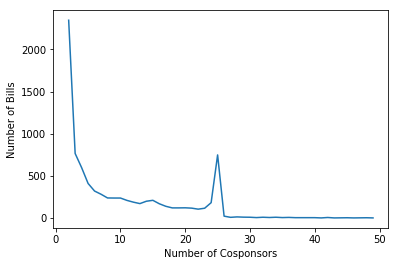

array([    0, 17752,  2347,   765,   597,   409,   319,   281,   237,
         236,   236,   208,   187,   170,   198,   209,   168,   138,
         119,   119,   120,   116,   104,   115,   181,   748,    21,
           7,    12,     9,     8,     4,     8,     5,     8,     4,
           6,     3,     3,     3,     3,     0,     5,     0,     1,
           2,     0,     1,     2,     0,     5,     1,     2,     1,
           1,     2,     0,     0,     1,     2,     1,     1,     1,
           1,     1,     0,     0,     1,     1,     1,     2,     1,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1])

In [31]:
plot_histogram(congress_df)

At what number of cosponsors are 90% bills included in that or less?

In [175]:
def plot_fraction_of_bills_by_cosponsors():
    for i in range(93, 115):
        df = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_" + str(i) + "_congress.csv")
        cosponsors_for_threshold = []
        threshold_range = np.arange(.5, 1, .05)
        for t in threshold_range:
            cosponsors_for_threshold.append(find_num_of_cosponsors(t * df.bill_number.unique().shape[0], plot_histogram(df, True)))
        plt.plot(threshold_range, cosponsors_for_threshold, label=i)
    plt.xlabel("Fraction of Bills")
    plt.ylabel("Number of Cosponsors")
    plt.title("Fraction of Bills by Cosponsor Number")
#     plt.legend()
    plt.savefig("plots/fraction_of_bills_by_cosponsors")
    plt.show()

/Users/emmaling/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2808: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


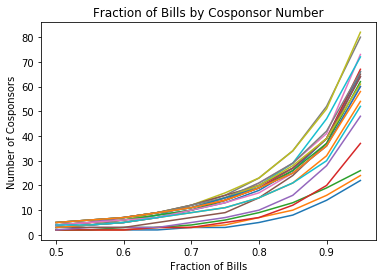

In [176]:
plot_fraction_of_bills_by_cosponsors()

In [33]:
bill_threshold = .8 * congress_df.bill_number.unique().shape[0]
bill_threshold

20977.600000000002

In [27]:
def find_num_of_cosponsors(t, arr): 
    i = 0
    while t > 0:
        t -= arr[i]
        i += 1
    return i

In [34]:
find_num_of_cosponsors(bill_threshold, plot_histogram(congress_df, True))

5

Want a dictionary `{person: [cosponsors in past]}`, note the graph does not include legislators who have not sponsored or cosponsored any bills yet - should do intersection of `legislators_93` and `legislators_94` later.

In [53]:
print(len(legislators_93))
print(len(thomas_ids))

547
547


# Get party affiliations

In [6]:
def get_last_name(name):
    return name['name'].split(",")[0].split(" ")[0].lower(), name['party']

In [7]:
def get_party_affiliations():
    house_affil = pd.read_csv("data/party_affiliation/house.csv")
    senate_affil = pd.read_csv("data/party_affiliation/senate.csv")
    party_affiliations = house_affil.append(senate_affil)
    party_affiliations = party_affiliations.apply(get_last_name, axis=1)
    party_affil_dict = {}
    for name, party in party_affiliations.unique():
        if party == 100:
            party_affil_dict[name] = "Democrat"
        elif party == 200:
            party_affil_dict[name] = "Republican"
    return party_affil_dict

# Make graph from cosponsorship data

In [8]:
def get_edges_from_lst(lst):
    edges = []
    for x in lst:
        for y in lst:
            if x != y and (x, y) not in edges and (y, x) not in edges:
                edges.append((x, y))
    return edges

In [9]:
def last_name(name):
    return name.split(",")[0].split(" ")[0].lower()

In [238]:
def make_graph(congress_df, party_affil_dict, date=None):
    g = nx.Graph()
    if date:
        congress_df = congress_df[congress_df.date_signed < date]
    for index, row in congress_df.iterrows():
        # Add edges from cosponsors to sponsors
        if not row.sponsor:
            sponsor = congress_df[(congress_df["bill_number"] == row["bill_number"]) & (congress_df["sponsor"] == True)].name
            if not sponsor.empty:
                sponsor_name = sponsor.values[0]
                if last_name(row['name']) in party_affil_dict.keys() and last_name(sponsor_name) in party_affil_dict.keys():
                    g.add_edge(row['name'], sponsor_name)
    return g

In [129]:
def get_bichromatic_ratio(g, party_affil_dict):
    bichromatic = 0
    for (x,y) in g.edges():
        if party_affil_dict[last_name(x)] != party_affil_dict[last_name(y)]:
            bichromatic += 1
    if g.number_of_edges() > 0:
        return bichromatic / g.number_of_edges()
    else:
        return 0

In [12]:
party_affil_dict = get_party_affiliations()

In [41]:
G_baseline = make_graph(congress_df, party_affil_dict)
print(G_baseline.number_of_nodes())
print(G_baseline.number_of_edges())

534
4489


In [99]:
congress_df[(congress_df.date_signed > date) & (congress_df.sponsor == False)].shape

(0, 10)

In [36]:
congress_df[congress_df.sponsor == True].shape

(21870, 10)

In [133]:
date = str(1787 + int(congress) * 2) + "-01-01"
G = make_graph(congress_df, party_affil_dict, date)

In [43]:
# plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [88]:
G.number_of_nodes()

0

In [89]:
G.number_of_edges()

0

In [186]:
def get_counts_over_time(g, congress_df, party_affil_dict, date):
    """Output b, f(w), f(d)"""
    congress_df = congress_df.sort_values("date_signed")
    w, w_b, d, d_b = 0, 0, 0, 0
    w_lst, w_b_lst, b_lst, d_lst, d_b_lst = [], [], [0], [], []
    last_date = date
    for index, row in congress_df[congress_df['date_signed'] >= date].iterrows():
        if not row.sponsor:
            sponsor = congress_df[(congress_df["bill_number"] == row["bill_number"]) & (congress_df["sponsor"] == True)].name
            if not sponsor.empty:
                sponsor_name = sponsor.values[0]
                if last_name(row['name']) in party_affil_dict.keys() and last_name(sponsor_name) in party_affil_dict.keys():
                    g.add_nodes_from([row['name'], sponsor_name])
                    if not g.has_edge(row['name'], sponsor_name):
                        if set(g.neighbors(row['name'])).intersection(set(g.neighbors(sponsor_name))):
                            if party_affil_dict[last_name(row['name'])] != party_affil_dict[last_name(sponsor_name)]:
                                w_b += 1
                            w += 1
                        else:
                            if party_affil_dict[last_name(row['name'])] != party_affil_dict[last_name(sponsor_name)]:
                                d_b += 1
                            d += 1
                        g.add_edge(row['name'], sponsor_name)
        this_date = row.date_signed
        if this_date != last_date:
            w_b_lst.append(w_b)
            w_lst.append(w)
            b_lst.append(get_bichromatic_ratio(g, party_affil_dict))
            d_b_lst.append(d_b)
            d_lst.append(d)
            last_date = this_date
    w_b_lst.append(w_b)
    w_lst.append(w)
    b_lst.append(get_bichromatic_ratio(g, party_affil_dict))
    d_b_lst.append(d_b)
    d_lst.append(d)
    return np.array(w_b_lst) , np.array(w_lst), np.array(b_lst[:-1]), np.array(d_b_lst), np.array(d_lst)

In [222]:
date = str(1787 + int(congress) * 2) + "-01-01"
G = make_graph(congress_df, party_affil_dict, date)
bichromatic_ratios = get_counts_over_time(G, congress_df, party_affil_dict, date)
bichromatic_ratios

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   3,   3,   6,   6,   6,
          7,   7,   8,  11,  12,  12,  12,  12,  14,  15,  16,  17,  17,
         18,  19,  24,  24,  24,  25,  28,  29,  30,  31,  32,  32,  32,
         32,  32,  32,  32,  34,  37,  39,  42,  43,  43,  43,  44,  45,
         47,  47,  47,  48,  48,  52,  52,  54,  54,  55,  57,  58,  58,
         59,  65,  68,  73,  73,  73,  74,  74,  74,  78,  80,  82,  83,
         85,  85,  85,  86,  88,  88,  88,  89,  92,  96, 100, 100, 102,
        103, 103, 105, 111, 113, 115, 116, 116, 117, 118, 120, 121, 122,
        123, 124, 124, 127, 129, 129, 132, 132, 132, 134, 137, 138, 138,
        141, 144, 144, 145, 149, 149, 149, 151, 152, 152, 155, 155, 155,
        158, 161, 161, 165, 165, 167, 167, 167, 167, 169, 169, 170, 171,
        172, 174, 179, 180, 180, 180, 181, 181, 185, 185, 187, 188, 190,
        190, 194, 194, 197, 198, 198, 198, 198, 198

In [223]:
bichromatic_ratios[1][-1] / bichromatic_ratios[1].shape[0] # number of edges added per day

3.5868945868945867

In [207]:
def plot_bichromatic_ratios_over_time(bichromatic_ratios):
    start_day = 100
    plt.plot(range(start_day, len(bichromatic_ratios)), bichromatic_ratios[start_day:])
    plt.xlabel("Time")
    plt.ylabel("Fraction of Bichromatic Edges")
    plt.title("Fraction of Bichromatic Edges Added Via Triadic Closure (Congress " + str(congress) + ")")
    plt.savefig("plots/bichromatic_closure_" + congress + "_start" + str(start_day))
    plt.show()

/Users/emmaling/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


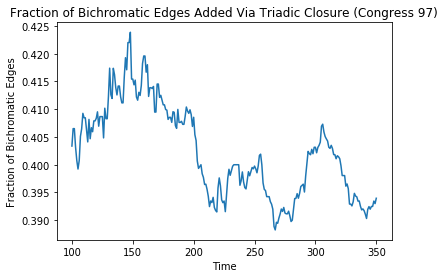

In [224]:
plot_bichromatic_ratios_over_time(bichromatic_ratios[0] / bichromatic_ratios[1])

In [209]:
def plot_bichromatic_ratio_f_diff_over_time(b, f):
    start_day = 100
    plt.plot(range(start_day, len(b)), b[start_day:] - f[start_day:])
    plt.xlabel("Time")
    plt.ylabel("b_(t-1) - f_t")
    plt.title("b_(t-1) - f_t, Congress " + str(congress))
    plt.savefig("plots/b_f_diff_" + congress + "_start" + str(start_day))
    plt.show()

/Users/emmaling/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


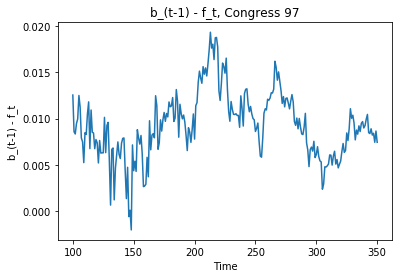

In [225]:
plot_bichromatic_ratio_f_diff_over_time(bichromatic_ratios[2], bichromatic_ratios[0] / bichromatic_ratios[1])

In [211]:
def plot_w_d_ratios_over_time(f_w, f_d):
    start_day = 100
    plt.plot(range(start_day, len(f_w)), f_w[start_day:] / f_d[start_day:])
    plt.xlabel("Time")
    plt.ylabel("f(w) / f(d)")
    plt.title("f(w) / f(d) (Congress " + str(congress) + ")")
    plt.savefig("plots/w_d_ratio_" + congress + "_start" + str(start_day))
    plt.show()

/Users/emmaling/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


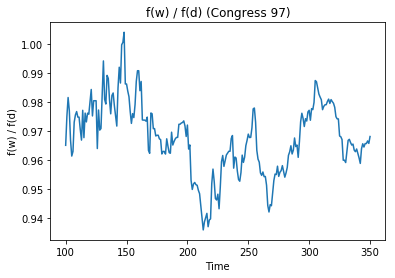

In [226]:
plot_w_d_ratios_over_time(bichromatic_ratios[0] / bichromatic_ratios[1], bichromatic_ratios[3] / bichromatic_ratios[4])

In [155]:
baseline_G = make_graph(congress_df, party_affil_dict)

aya       bill_number                name  thomas_id  bioguide_id state  district  \
27  hconres129-93   Stanton, James V.       1100          NaN    OH      20.0   
28  hconres129-93  Addabbo, Joseph P.          6          NaN    NY       7.0   
29  hconres129-93      Carey, Hugh L.        175          NaN    NY      15.0   
30  hconres129-93    Wolff, Lester L.       1239          NaN    NY       6.0   

    sponsor  original_cosponsor date_signed  date_withdrawn  
27     True               False  1973-02-27             NaN  
28    False               False  1973-01-03             NaN  
29    False               False  1973-01-03             NaN  
30    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
32  hconres130-93     Wolff, Lester L.       1239          NaN    NY   
33  hconres130-93    Denholm, Frank E.        286          NaN    SD   
34  hconres130-93  Gilman, Benjamin A.        440          N

aya        bill_number                     name  thomas_id  bioguide_id state  \
170  hconres264-93         Studds, Gerry E.       1121          NaN    MA   
171  hconres264-93          Burke, James A.        149          NaN    MA   
172  hconres264-93     Moakley, John Joseph        820          NaN    MA   
173  hconres264-93  O'Neill, Thomas P., Jr.        874          NaN    MA   

     district  sponsor  original_cosponsor date_signed  date_withdrawn  
170      12.0     True               False  1973-07-10             NaN  
171      11.0    False               False  1973-01-03             NaN  
172       9.0    False               False  1973-01-03             NaN  
173       8.0    False               False  1973-01-03             NaN  
aya        bill_number                  name  thomas_id  bioguide_id state  \
174  hconres265-93      Wolff, Lester L.       1239          NaN    NY   
175  hconres265-93  Daniels, Dominick V.        262          NaN    NJ   
176  hconres265-93 

aya        bill_number                 name  thomas_id  bioguide_id state  \
264  hconres342-93  Fish, Hamilton, Jr.        384          NaN    NY   
265  hconres342-93     Flood, Daniel J.        391          NaN    PA   
266  hconres342-93   O'Brien, George M.        872          NaN    IL   
267  hconres342-93         Ryan, Leo J.       1006          NaN    CA   
268  hconres342-93    Walsh, William F.       1198          NaN    NY   

     district  sponsor  original_cosponsor date_signed  date_withdrawn  
264      25.0     True               False  1973-10-10             NaN  
265      11.0    False               False  1973-01-03             NaN  
266      17.0    False               False  1973-01-03             NaN  
267      11.0    False               False  1973-01-03             NaN  
268      33.0    False               False  1973-01-03             NaN  
aya        bill_number                 name  thomas_id  bioguide_id state  \
271  hconres347-93     Huber, Robert J.   

aya        bill_number               name  thomas_id  bioguide_id state  district  \
411  hconres480-93  Long, Clarence D.        703          NaN    MD       2.0   
412  hconres480-93    Fulton, Richard        420          NaN    TN       5.0   

     sponsor  original_cosponsor date_signed  date_withdrawn  
411     True               False  1974-04-23             NaN  
412    False               False  1973-01-03             NaN  
aya        bill_number                  name  thomas_id  bioguide_id state  \
424  hconres492-93  Bingham, Jonathan B.         90          NaN    NY   
425  hconres492-93         Frenzel, Bill        415          NaN    MN   

     district  sponsor  original_cosponsor date_signed  date_withdrawn  
424      22.0     True               False  1974-05-13             NaN  
425       3.0    False               False  1973-01-03             NaN  
aya        bill_number                  name  thomas_id  bioguide_id state  \
440  hconres514-93       Grasso, Ella T

aya        bill_number                    name  thomas_id  bioguide_id state  \
568  hconres648-93  du Pont, Pierre S., IV        319          NaN    DE   
569  hconres648-93        Collins, Cardiss        220          NaN    IL   
570  hconres648-93        Horton, Frank J.        560          NaN    NY   

     district  sponsor  original_cosponsor date_signed  date_withdrawn  
568       NaN     True               False  1974-09-24             NaN  
569       7.0    False               False  1974-12-31             NaN  
570      34.0    False               False  1973-01-03             NaN  
aya        bill_number                  name  thomas_id  bioguide_id state  \
571  hconres649-93      Flood, Daniel J.        391          NaN    PA   
572  hconres649-93     Delaney, James J.        280          NaN    NY   
573  hconres649-93  Derwinski, Edward J.        290          NaN    IL   
574  hconres649-93      Huber, Robert J.        568          NaN    MI   
575  hconres649-93       

aya       bill_number                 name  thomas_id  bioguide_id state  \
720  hjres1044-93      Esch, Marvin L.        353          NaN    MI   
721  hjres1044-93  Ketchum, William M.        629          NaN    CA   
722  hjres1044-93   Mosher, Charles A.        837          NaN    OH   

     district  sponsor  original_cosponsor date_signed  date_withdrawn  
720       2.0     True               False  1974-06-03             NaN  
721      36.0    False               False  1973-01-03             NaN  
722      13.0    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
723  hjres1047-93  Ichord, Richard H.        581          NaN    MO       8.0   
724  hjres1047-93       Frenzel, Bill        415          NaN    MN       3.0   
725  hjres1047-93      Thone, Charles       1154          NaN    NE       1.0   
726  hjres1047-93    Wolff, Lester L.       1239          NaN    NY       6.0   

     

821    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
822  hjres1116-93  Gilman, Benjamin A.        440          NaN    NY   
823  hjres1116-93     Wolff, Lester L.       1239          NaN    NY   

     district  sponsor  original_cosponsor date_signed  date_withdrawn  
822      26.0     True               False  1974-08-22             NaN  
823       6.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
845  hjres1139-93        Gude, Gilbert        474          NaN    MD   
846  hjres1139-93  Fish, Hamilton, Jr.        384          NaN    NY   
847  hjres1139-93      Koch, Edward I.        643          NaN    NY   
848  hjres1139-93  Seiberling, John F.       1040          NaN    OH   

     district  sponsor  original_cosponsor date_signed  date_withdrawn  
845       8.0     True               False  1974-09-23     

aya       bill_number                name  thomas_id  bioguide_id state  district  \
1065  hjres270-93    Dingell, John D.        299          NaN    MI      16.0   
1066  hjres270-93  Anderson, Glenn M.         16          NaN    CA      35.0   
1067  hjres270-93  Gubser, Charles S.        473          NaN    CA      10.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
1065     True               False  1973-01-31             NaN  
1066    False               False  1973-01-03             NaN  
1067    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
1081  hjres283-93  Shriver, Garner E.       1053          NaN    KS       4.0   
1082  hjres283-93  Sebelius, Keith G.       1039          NaN    KS       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
1081     True               False  1973-02-01             NaN  
1082    False               False  1973

aya       bill_number                 name  thomas_id  bioguide_id state  \
1221  hjres393-93  Perkins, Carl Dewey        908          NaN    KY   
1222  hjres393-93     O'Hara, James G.        873          NaN    MI   
1223  hjres393-93      Quie, Albert H.        936          NaN    MN   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
1221       7.0     True               False  1973-02-28             NaN  
1222      12.0    False               False  1973-01-03             NaN  
1223       1.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
1225  hjres395-93    Wilson, Robert C.       1234          NaN    CA   
1226  hjres395-93  Van Deerlin, Lionel       1179          NaN    CA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
1225      40.0     True               False  1973-02-28             NaN  
1226      41.0    False               Fals

aya       bill_number                    name  thomas_id  bioguide_id state  \
1335  hjres488-93  Whitehurst, G. William       1221          NaN    VA   
1336  hjres488-93           Abdnor, James          1          NaN    SD   
1337  hjres488-93     Cleveland, James C.        206          NaN    NH   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
1335       2.0     True               False  1973-04-04             NaN  
1336       2.0    False               False  1973-01-03             NaN  
1337       2.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
1338  hjres489-93      Biaggi, Mario         85          NaN    NY      10.0   
1339  hjres489-93  Waldie, Jerome R.       1193          NaN    CA      14.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
1338     True               False  1973-04-05             NaN  
1339    False             

aya       bill_number                  name  thomas_id  bioguide_id state  \
1429  hjres570-93         Findley, Paul        382          NaN    IL   
1430  hjres570-93     Arends, Leslie C.         27          NaN    IL   
1431  hjres570-93    Madigan, Edward R.        724          NaN    IL   
1432  hjres570-93  Railsback, Thomas F.        941          NaN    IL   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
1429      20.0     True               False  1973-05-23             NaN  
1430      15.0    False               False  1973-01-03             NaN  
1431      21.0    False               False  1973-01-03             NaN  
1432      19.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
1444  hjres585-93  Bingham, Jonathan B.         90          NaN    NY   
1445  hjres585-93   Schroeder, Patricia       1033          NaN    CO   
1446  hjres585-93         Stokes, Lou

aya       bill_number                    name  thomas_id  bioguide_id state  \
1603  hjres726-93  Diggs, Charles C., Jr.        298          NaN    MI   
1604  hjres726-93        Howard, James J.        564          NaN    NJ   
1605  hjres726-93      Mosher, Charles A.        837          NaN    OH   
1606  hjres726-93      Podell, Bertram L.        920          NaN    NY   
1607  hjres726-93       Roybal, Edward R.        996          NaN    CA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
1603      13.0     True               False  1973-09-18             NaN  
1604       3.0    False               False  1973-01-03             NaN  
1605      13.0    False               False  1973-01-03             NaN  
1606      13.0    False               False  1973-01-03             NaN  
1607      30.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
1612  hjres735-93

aya       bill_number                 name  thomas_id  bioguide_id state  \
1749  hjres865-93  Wiggins, Charles E.       1228          NaN    CA   
1750  hjres865-93  Fish, Hamilton, Jr.        384          NaN    NY   
1751  hjres865-93  Gilman, Benjamin A.        440          NaN    NY   
1752  hjres865-93  Scherle, William J.       1028          NaN    IA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
1749      25.0     True               False  1973-12-14             NaN  
1750      25.0    False               False  1973-01-03             NaN  
1751      26.0    False               False  1973-01-03             NaN  
1752       5.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
1753  hjres866-93     Bell, Alphonzo         73          NaN    CA      28.0   
1754  hjres866-93  Fraser, Donald M.        411          NaN    MN       5.0   

      sponsor  origi

aya      bill_number                   name  thomas_id  bioguide_id state  \
1906  hr10001-93      Fascell, Dante B.        370          NaN    FL   
1907  hr10001-93  Goldwater, Barry, Jr.        444          NaN    CA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
1906      15.0     True               False  1973-08-03             NaN  
1907      27.0    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
1912  hr10006-93  Keating, William J.        622          NaN    OH       1.0   
1913  hr10006-93           Kemp, Jack        625          NaN    NY      38.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
1912     True               False  1973-08-03             NaN  
1913    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
1914  hr10008-93  Long, Clarenc

2021       NaN    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
2025  hr10094-93           Hosmer, Craig        561          NaN    CA   
2026  hr10094-93       King, Carleton J.        634          NaN    NY   
2027  hr10094-93  Waggonner, Joe D., Jr.       1191          NaN    LA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
2025      32.0     True               False  1973-09-06             NaN  
2026      29.0    False               False  1973-01-03             NaN  
2027       4.0    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
2029  hr10096-93  Latta, Delbert L.        668          NaN    OH       5.0   
2030  hr10096-93    Guyer, Tennyson        480          NaN    OH       4.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2029     True          

aya      bill_number                name  thomas_id  bioguide_id state  district  \
2136  hr10184-93  Tiernan, Robert O.       1159          NaN    RI       2.0   
2137  hr10184-93    Roush, J. Edward        991          NaN    IN       4.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2136     True               False  1973-09-11             NaN  
2137    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
2138  hr10185-93  Whitehurst, G. William       1221          NaN    VA   
2139  hr10185-93        Wolff, Lester L.       1239          NaN    NY   
2140  hr10185-93     Won Pat, Antonio B.       1241          NaN    GU   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
2138       2.0     True               False  1973-09-11             NaN  
2139       6.0    False               False  1973-01-03             NaN  
2140       NaN    False               Fa

aya      bill_number                name  thomas_id  bioguide_id state  district  \
2246  hr10266-93  Rangel, Charles B.        944          NaN    NY      19.0   
2247  hr10266-93    Helstoski, Henry        529          NaN    NJ       9.0   
2248  hr10266-93       Moss, John E.        838          NaN    CA       3.0   
2249  hr10266-93      Roe, Robert A.        974          NaN    NJ       8.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2246     True               False  1973-09-13             NaN  
2247    False               False  1973-01-03             NaN  
2248    False               False  1973-01-03             NaN  
2249    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
2255  hr10274-93       Steelman, Alan       1106          NaN    TX       5.0   
2256  hr10274-93  Stark, Fortney Pete       1101          NaN    CA       8.0   
2257  hr10274-93   Wylie, Ch

aya      bill_number               name  thomas_id  bioguide_id state  district  \
2379  hr10368-93  Hebert, F. Edward        521          NaN    LA       1.0   
2380  hr10368-93   Horton, Frank J.        560          NaN    NY      34.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2379     True               False  1973-09-19             NaN  
2380    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
2381  hr10369-93  Hebert, F. Edward        521          NaN    LA       1.0   
2382  hr10369-93   Horton, Frank J.        560          NaN    NY      34.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2381     True               False  1973-09-19             NaN  
2382    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
2384  hr10370-93  Hebert, F. Edward        521   

aya      bill_number                     name  thomas_id  bioguide_id state  \
2528  hr10481-93       Anderson, Glenn M.         16          NaN    CA   
2529  hr10481-93  Biester, Edward G., Jr.         86          NaN    PA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
2528      35.0     True               False  1973-09-25             NaN  
2529       8.0    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
2539  hr10492-93  Kastenmeier, Robert W.        620          NaN    WI   
2540  hr10492-93       Chisholm, Shirley        195          NaN    NY   
2541  hr10492-93     Schroeder, Patricia       1033          NaN    CO   
2542  hr10492-93           Stokes, Louis       1115          NaN    OH   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
2539       2.0     True               False  1973-09-25             NaN  
2540      12.0    False  

aya      bill_number                name  thomas_id  bioguide_id state  district  \
2689  hr10612-93     Kyros, Peter N.        656          NaN    ME       1.0   
2690  hr10612-93          Fuqua, Don        422          NaN    FL       2.0   
2691  hr10612-93  Sebelius, Keith G.       1039          NaN    KS       1.0   
2692  hr10612-93  Shriver, Garner E.       1053          NaN    KS       4.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2689     True               False  1973-10-01             NaN  
2690    False               False  1973-01-03             NaN  
2691    False               False  1973-01-03             NaN  
2692    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
2693  hr10614-93      Pike, Otis G.        918          NaN    NY       1.0   
2694  hr10614-93  King, Carleton J.        634          NaN    NY      29.0   

      sponsor  original_cosponsor

aya      bill_number             name  thomas_id  bioguide_id state  district  \
2831  hr10737-93  Abzug, Bella S.          3          NaN    NY      20.0   
2832  hr10737-93  Culver, John C.        255          NaN    IA       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2831     True               False  1973-10-04             NaN  
2832    False               False  1973-01-03             NaN  
aya      bill_number             name  thomas_id  bioguide_id state  district  \
2833  hr10738-93  Abzug, Bella S.          3          NaN    NY      20.0   
2834  hr10738-93  Culver, John C.        255          NaN    IA       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2833     True               False  1973-10-04             NaN  
2834    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
2835  hr10739-93      Abzug, Bella S.          3          N

aya      bill_number              name  thomas_id  bioguide_id state  district  \
2962  hr10849-93  Peyser, Peter A.        915          NaN    NY      23.0   
2963  hr10849-93   Koch, Edward I.        643          NaN    NY      18.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2962     True               False  1973-10-10             NaN  
2963    False               False  1973-01-03             NaN  
aya      bill_number             name  thomas_id  bioguide_id state  district  \
2966  hr10851-93  Rarick, John R.        945          NaN    LA       6.0   
2967  hr10851-93   Thone, Charles       1154          NaN    NE       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
2966     True               False  1973-10-10             NaN  
2967    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
2974  hr10858-93        Dingell, John D.        299          Na

3071    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
3081  hr10944-93    Waldie, Jerome R.       1193          NaN    CA      14.0   
3082  hr10944-93   Anderson, Glenn M.         16          NaN    CA      35.0   
3083  hr10944-93  Rinaldo, Matthew J.        963          NaN    NJ      12.0   
3084  hr10944-93         Ryan, Leo J.       1006          NaN    CA      11.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3081     True               False  1973-10-16             NaN  
3082    False               False  1973-01-03             NaN  
3083    False               False  1973-01-03             NaN  
3084    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
3087  hr10948-93    Breaux, John B.        120          NaN    LA       7.0   
3088  hr10948-93  Cohen, William S.        2

3201       4.0    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
3203  hr11030-93  Seiberling, John F.       1040          NaN    OH      14.0   
3204  hr11030-93      Abzug, Bella S.          3          NaN    NY      20.0   
3205  hr11030-93        Stokes, Louis       1115          NaN    OH      21.0   
3206  hr11030-93     Wolff, Lester L.       1239          NaN    NY       6.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3203     True               False  1973-10-18             NaN  
3204    False               False  1973-01-03             NaN  
3205    False               False  1973-01-03             NaN  
3206    False               False  1973-01-03             NaN  
aya      bill_number              name  thomas_id  bioguide_id state  district  \
3210  hr11039-93     Young, Edward       1257          NaN    SC       6.0   
3211  hr11039-93  Davis, Mendel J.  

3306      33.0    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
3312  hr11113-93  Hebert, F. Edward        521          NaN    LA       1.0   
3313  hr11113-93     Nelsen, Ancher        858          NaN    MN       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3312     True               False  1973-10-25             NaN  
3313    False               False  1973-01-03             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
3326  hr11131-93        Skubitz, Joe       1065          NaN    KS       5.0   
3327  hr11131-93  Sebelius, Keith G.       1039          NaN    KS       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3326     True               False  1973-10-25             NaN  
3327    False               False  1973-01-03             NaN  
aya      bill_number                  name  thomas_id  

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
3427  hr11211-93      Lent, Norman F.        682          NaN    NY       4.0   
3428  hr11211-93  Roncallo, Angelo D.        982          NaN    NY       3.0   
3429  hr11211-93      Wydler, John W.       1248          NaN    NY       5.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3427     True               False  1973-10-31             NaN  
3428    False               False  1973-01-03             NaN  
3429    False               False  1973-01-03             NaN  
aya      bill_number                       name  thomas_id  bioguide_id state  \
3431  hr11215-93             Pepper, Claude        907          NaN    FL   
3432  hr11215-93  Boggs, Corinne C. (Lindy)        103          NaN    LA   
3433  hr11215-93         Conyers, John, Jr.        229          NaN    MI   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
3431      14.0     True     

3532       4.0    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
3543  hr11308-93  Fraser, Donald M.        411          NaN    MN       5.0   
3544  hr11308-93    Grasso, Ella T.        458          NaN    CT       6.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3543     True               False  1973-11-07             NaN  
3544    False               False  1973-01-03             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
3549  hr11312-93  Hastings, James F.        513          NaN    NY      39.0   
3550  hr11312-93   Collins, James M.        221          NaN    TX       3.0   
3551  hr11312-93     Lent, Norman F.        682          NaN    NY       4.0   
3552  hr11312-93   McDade, Joseph M.        765          NaN    PA      10.0   
3553  hr11312-93  Metcalfe, Ralph H.        793          NaN    IL       1.0   

      s

aya      bill_number                name  thomas_id  bioguide_id state  district  \
3697  hr11448-93     Rogers, Paul G.        978          NaN    FL      11.0   
3698  hr11448-93     Carter, Tim Lee        181          NaN    KY       5.0   
3699  hr11448-93     Kyros, Peter N.        656          NaN    ME       1.0   
3700  hr11448-93  Preyer, Richardson        928          NaN    NC       6.0   
3701  hr11448-93     Roy, William R.        995          NaN    KS       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3697     True               False  1973-11-13             NaN  
3698    False               False  1973-01-03             NaN  
3699    False               False  1973-01-03             NaN  
3700    False               False  1973-01-03             NaN  
3701    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
3704  hr11451-93  Anderson, John B.         17  

aya      bill_number              name  thomas_id  bioguide_id state  district  \
3889  hr11613-93   Breaux, John B.        120          NaN    LA       7.0   
3890  hr11613-93  Hanley, James M.        493          NaN    NY      32.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3889     True               False  1973-11-28             NaN  
3890    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
3891  hr11614-93    Burke, James A.        149          NaN    MA      11.0   
3892  hr11614-93  Giaimo, Robert N.        436          NaN    CT       3.0   
3893  hr11614-93  Steele, Robert H.       1105          NaN    CT       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
3891     True               False  1973-11-28             NaN  
3892    False               False  1973-01-03             NaN  
3893    False               False  1973-01-03           

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
4044  hr11745-93    Hebert, F. Edward        521          NaN    LA       1.0   
4045  hr11745-93  Miller, Clarence E.        806          NaN    OH      10.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
4044     True               False  1973-12-03             NaN  
4045    False               False  1973-01-03             NaN  
aya      bill_number                   name  thomas_id  bioguide_id state  \
4051  hr11754-93             Ullman, Al       1174          NaN    OR   
4052  hr11754-93  Schneebeli, Herman T.       1031          NaN    PA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
4051       2.0     True               False  1973-12-03             NaN  
4052      17.0    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
4053  hr11755-93  Veysey, Victo

4208    False               False  1973-01-03             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
4209  hr11879-93  Tiernan, Robert O.       1159          NaN    RI       2.0   
4210  hr11879-93        Edwards, Don        336          NaN    CA       9.0   
4211  hr11879-93    Flood, Daniel J.        391          NaN    PA      11.0   
4212  hr11879-93   Gaydos, Joseph M.        430          NaN    PA      20.0   
4213  hr11879-93  Metcalfe, Ralph H.        793          NaN    IL       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
4209     True               False  1973-12-10             NaN  
4210    False               False  1973-01-03             NaN  
4211    False               False  1973-01-03             NaN  
4212    False               False  1973-01-03             NaN  
4213    False               False  1973-01-03             NaN  
aya      bill_number           name  thomas_id  bioguide_id state  

aya      bill_number             name  thomas_id  bioguide_id state  district  \
4314  hr11957-93    Price, Melvin        929          NaN    IL      23.0   
4315  hr11957-93  Holifield, Chet        551          NaN    CA      19.0   
4316  hr11957-93    Hosmer, Craig        561          NaN    CA      32.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
4314     True               False  1973-12-13             NaN  
4315    False               False  1973-01-03             NaN  
4316    False               False  1973-01-03             NaN  
aya      bill_number                  name  thomas_id  bioguide_id state  \
4322  hr11962-93  Bingham, Jonathan B.         90          NaN    NY   
4323  hr11962-93        Bell, Alphonzo         73          NaN    CA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
4322      22.0     True               False  1973-12-14             NaN  
4323      28.0    False               False  1973-01-03       

aya      bill_number             name  thomas_id  bioguide_id state  district  \
4496  hr12103-93   Brinkley, Jack        124          NaN    GA       3.0   
4497  hr12103-93  Murphy, John M.        842          NaN    NY      17.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
4496     True               False  1973-12-21             NaN  
4497    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
4500  hr12108-93    Fraser, Donald M.        411          NaN    MN       5.0   
4501  hr12108-93  Blatnik, John Anton         95          NaN    MN       8.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
4500     True               False  1973-12-21             NaN  
4501    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
4502  hr12109-93       Fraser, Donald M.        411   

4708    False               False  1973-01-03             NaN  
aya      bill_number                     name  thomas_id  bioguide_id state  \
4709  hr12286-93     Railsback, Thomas F.        941          NaN    IL   
4710  hr12286-93  Biester, Edward G., Jr.         86          NaN    PA   
4711  hr12286-93      Butler, M. Caldwell        159          NaN    VA   
4712  hr12286-93        Cohen, William S.        215          NaN    ME   
4713  hr12286-93      Fish, Hamilton, Jr.        384          NaN    NY   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
4709      19.0     True               False  1974-01-24             NaN  
4710       8.0    False               False  1973-01-03             NaN  
4711       6.0    False               False  1973-01-03             NaN  
4712       2.0    False               False  1973-01-03             NaN  
4713      25.0    False               False  1973-01-03             NaN  
aya      bill_number                 

aya      bill_number                  name  thomas_id  bioguide_id state  \
4915  hr12464-93  Hawkins, Augustus F.        515          NaN    CA   
4916  hr12464-93        Bell, Alphonzo         73          NaN    CA   
4917  hr12464-93   Perkins, Carl Dewey        908          NaN    KY   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
4915      21.0     True               False  1974-01-31             NaN  
4916      28.0    False               False  1973-01-03             NaN  
4917       7.0    False               False  1973-01-03             NaN  
aya      bill_number                   name  thomas_id  bioguide_id state  \
4935  hr12481-93             Ullman, Al       1174          NaN    OR   
4936  hr12481-93  Schneebeli, Herman T.       1031          NaN    PA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
4935       2.0     True               False  1974-02-04             NaN  
4936      17.0    False               F

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
5012  hr12533-93  Scherle, William J.       1028          NaN    IA       5.0   
5013  hr12533-93    Cohen, William S.        215          NaN    ME       2.0   
5014  hr12533-93     Young, Samuel H.       1260          NaN    IL      10.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5012     True               False  1974-02-04             NaN  
5013    False               False  1973-01-03             NaN  
5014    False               False  1973-01-03             NaN  
aya      bill_number             name  thomas_id  bioguide_id state  district  \
5024  hr12545-93   Zwach, John M.       1267          NaN    MN       6.0   
5025  hr12545-93   Nelsen, Ancher        858          NaN    MN       2.0   
5026  hr12545-93  Quie, Albert H.        936          NaN    MN       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5024     True               False  197

aya      bill_number               name  thomas_id  bioguide_id state  district  \
5230  hr12721-93  Fraser, Donald M.        411          NaN    MN       5.0   
5231  hr12721-93       Ryan, Leo J.       1006          NaN    CA      11.0   
5232  hr12721-93      Stokes, Louis       1115          NaN    OH      21.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5230     True               False  1974-02-07             NaN  
5231    False               False  1973-01-03             NaN  
5232    False               False  1973-01-03             NaN  
aya      bill_number           name  thomas_id  bioguide_id state  district  \
5237  hr12726-93  Hansen, Orval        500          NaN    ID       2.0   
5238  hr12726-93  Towell, David       1164          NaN    NV       NaN   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5237     True               False  1974-02-07             NaN  
5238    False               False  1973-01-03             NaN  
a

aya      bill_number                     name  thomas_id  bioguide_id state  \
5378  hr12845-93       Shriver, Garner E.       1053          NaN    KS   
5379  hr12845-93  Hudnut, William H., III        570          NaN    IN   
5380  hr12845-93          Roy, William R.        995          NaN    KS   
5381  hr12845-93          Wyman, Louis C.       1250          NaN    NH   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
5378       4.0     True               False  1974-02-14             NaN  
5379      11.0    False               False  1973-01-03             NaN  
5380       2.0    False               False  1973-01-03             NaN  
5381       1.0    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
5383  hr12847-93  Staggers, Harley O.       1096          NaN    WV       2.0   
5384  hr12847-93    Devine, Samuel L.        292          NaN    OH      12.0   

  

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
5514  hr12959-93   Landgrebe, Earl F.        661          NaN    IN       2.0   
5515  hr12959-93  Bennett, Charles E.         77          NaN    FL       3.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5514     True               False  1974-02-21             NaN  
5515    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
5518  hr12962-93           Litton, Jerry        695          NaN    MO   
5519  hr12962-93     Holtzman, Elizabeth        556          NaN    NY   
5520  hr12962-93      Preyer, Richardson        928          NaN    NC   
5521  hr12962-93  Rosenthal, Benjamin S.        987          NaN    NY   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
5518       6.0     True               False  1974-02-21             NaN  
5519      16.0    False              

aya      bill_number              name  thomas_id  bioguide_id state  district  \
5645  hr13059-93  Dellenback, John        283          NaN    OR       4.0   
5646  hr13059-93   Quie, Albert H.        936          NaN    MN       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5645     True               False  1974-02-27             NaN  
5646    False               False  1973-01-03             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
5651  hr13064-93  Collier, Harold R.        218          NaN    IL       6.0   
5652  hr13064-93   Rostenkowski, Dan        988          NaN    IL       8.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5651     True               False  1974-02-27             NaN  
5652    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
5656  hr13069-93    Fraser, Donald M.        41

aya      bill_number                        name  thomas_id  bioguide_id state  \
5805  hr13205-93  Parris, Stanford E. (Stan)        890          NaN    VA   
5806  hr13205-93          Sarasin, Ronald A.       1016          NaN    CT   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
5805       8.0     True               False  1974-03-04             NaN  
5806       5.0    False               False  1973-01-03             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
5821  hr13221-93  Johnson, Harold T.        600          NaN    CA       2.0   
5822  hr13221-93     Haley, James A.        482          NaN    FL       8.0   
5823  hr13221-93       Hosmer, Craig        561          NaN    CA      32.0   
5824  hr13221-93  Lujan, Manuel, Jr.        712          NaN    NM       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
5821     True               False  1974-03-05             NaN  
5822  

aya      bill_number                     name  thomas_id  bioguide_id state  \
5989  hr13362-93  Johnson, James P. (Jim)        601          NaN    CO   
5990  hr13362-93    Armstrong, William L.         29          NaN    CO   
5991  hr13362-93      Brotzman, Donald G.        129          NaN    CO   
5992  hr13362-93          Evans, Frank E.        360          NaN    CO   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
5989       4.0     True               False  1974-03-11             NaN  
5990       5.0    False               False  1973-01-03             NaN  
5991       2.0    False               False  1973-01-03             NaN  
5992       3.0    False               False  1973-01-03             NaN  
aya      bill_number                     name  thomas_id  bioguide_id state  \
5993  hr13363-93  Johnson, James P. (Jim)        601          NaN    CO   
5994  hr13363-93    Armstrong, William L.         29          NaN    CO   
5995  hr13363-93     

aya      bill_number                  name  thomas_id  bioguide_id state  \
6168  hr13509-93  McKinney, Stewart B.        781          NaN    CT   
6169  hr13509-93    Sarasin, Ronald A.       1016          NaN    CT   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
6168       4.0     True               False  1974-03-14             NaN  
6169       5.0    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
6175  hr13517-93    Railsback, Thomas F.        941          NaN    IL   
6176  hr13517-93  du Pont, Pierre S., IV        319          NaN    DE   
6177  hr13517-93  Harrington, Michael J.        503          NaN    MA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
6175      19.0     True               False  1974-03-14             NaN  
6176       NaN    False               False  1973-01-03             NaN  
6177       6.0    False           

6274    False               False  1973-01-03             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
6293  hr13613-93    Karth, Joseph E.        617          NaN    MN       4.0   
6294  hr13613-93    Corman, James C.        234          NaN    CA      22.0   
6295  hr13613-93  Johnson, Harold T.        600          NaN    CA       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
6293     True               False  1974-03-20             NaN  
6294    False               False  1973-01-03             NaN  
6295    False               False  1973-01-03             NaN  
aya      bill_number                   name  thomas_id  bioguide_id state  \
6303  hr13620-93  Armstrong, William L.         29          NaN    CO   
6304  hr13620-93             Kemp, Jack        625          NaN    NY   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
6303       5.0     True               False  1974-03-20  

aya      bill_number               name  thomas_id  bioguide_id state  district  \
6413  hr13709-93     Roe, Robert A.        974          NaN    NJ       8.0   
6414  hr13709-93  Chisholm, Shirley        195          NaN    NY      12.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
6413     True               False  1974-03-25             NaN  
6414    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
6416  hr13710-93     Roe, Robert A.        974          NaN    NJ       8.0   
6417  hr13710-93  Chisholm, Shirley        195          NaN    NY      12.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
6416     True               False  1974-03-25             NaN  
6417    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
6423  hr13716-93  Waldie, Jerome R.       1193   

aya      bill_number                  name  thomas_id  bioguide_id state  \
6598  hr13860-93  Thompson, Frank, Jr.       1152          NaN    NJ   
6599  hr13860-93      Gray, Kenneth J.        459          NaN    IL   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
6598       4.0     True               False  1974-04-01             NaN  
6599      24.0    False               False  1973-01-03             NaN  
aya      bill_number                     name  thomas_id  bioguide_id state  \
6605  hr13867-93            Moss, John E.        838          NaN    CA   
6606  hr13867-93       Johnson, Harold T.        600          NaN    CA   
6607  hr13867-93  McCloskey, Paul N., Jr.        759          NaN    CA   
6608  hr13867-93          McFall, John J.        770          NaN    CA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
6605       3.0     True               False  1974-04-01             NaN  
6606       2.0    False      

aya      bill_number             name  thomas_id  bioguide_id state  district  \
6686  hr13919-93    Price, Melvin        929          NaN    IL      23.0   
6687  hr13919-93  Holifield, Chet        551          NaN    CA      19.0   
6688  hr13919-93    Hosmer, Craig        561          NaN    CA      32.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
6686     True               False  1974-04-02             NaN  
6687    False               False  1973-01-03             NaN  
6688    False               False  1973-01-03             NaN  
aya      bill_number                        name  thomas_id  bioguide_id state  \
6695  hr13928-93           Broyhill, Joel T.        139          NaN    VA   
6696  hr13928-93  Frelinghuysen, Peter H. B.        413          NaN    NJ   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
6695      10.0     True               False  1974-04-03             NaN  
6696       5.0    False               False 

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
6813  hr14017-93       Burleson, Omar        151          NaN    TX      17.0   
6814  hr14017-93  Maraziti, Joseph J.        734          NaN    NJ      13.0   
6815  hr14017-93  Roncallo, Angelo D.        982          NaN    NY       3.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
6813     True               False  1974-04-08             NaN  
6814    False               False  1973-01-03             NaN  
6815    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
6820  hr14023-93         Koch, Edward I.        643          NaN    NY   
6821  hr14023-93            Edwards, Don        336          NaN    CA   
6822  hr14023-93  Riegle, Donald W., Jr.        961          NaN    MI   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
6820      18.0     True               Fa

aya      bill_number               name  thomas_id  bioguide_id state  district  \
6949  hr14122-93  Fraser, Donald M.        411          NaN    MN       5.0   
6950  hr14122-93  Chisholm, Shirley        195          NaN    NY      12.0   
6951  hr14122-93   Ford, William D.        401          NaN    MI      15.0   
6952  hr14122-93       Green, Edith        461          NaN    OR       3.0   
6953  hr14122-93     Steelman, Alan       1106          NaN    TX       5.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
6949     True               False  1974-04-10             NaN  
6950    False               False  1973-01-03             NaN  
6951    False               False  1973-01-03             NaN  
6952    False               False  1973-01-03             NaN  
6953    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
6957  hr14126-93  Hebert, F. Edward        521        

aya      bill_number             name  thomas_id  bioguide_id state  district  \
7030  hr14181-93  Rogers, Paul G.        978          NaN    FL      11.0   
7031  hr14181-93  Carter, Tim Lee        181          NaN    KY       5.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7030     True               False  1974-04-10             NaN  
7031    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
7038  hr14188-93   Winn, Larry, Jr.       1235          NaN    KS       3.0   
7039  hr14188-93  Fraser, Donald M.        411          NaN    MN       5.0   
7040  hr14188-93        Heinz, John        528          NaN    PA      18.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7038     True               False  1974-04-10             NaN  
7039    False               False  1973-01-03             NaN  
7040    False               False  1973-01-03             N

aya      bill_number                name  thomas_id  bioguide_id state  district  \
7174  hr14302-93  Rousselot, John H.        992          NaN    CA      24.0   
7175  hr14302-93       Dent, John H.        288          NaN    PA      21.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7174     True               False  1974-04-23             NaN  
7175    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
7176  hr14303-93         Roy, William R.        995          NaN    KS   
7177  hr14303-93       Collins, James M.        221          NaN    TX   
7178  hr14303-93  Hammerschmidt, John P.        490          NaN    AR   
7179  hr14303-93             Sisk, B. F.       1061          NaN    CA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
7176       2.0     True               False  1974-04-23             NaN  
7177       3.0    False               Fa

aya      bill_number                     name  thomas_id  bioguide_id state  \
7342  hr14443-93  Conable, Barber B., Jr.        225          NaN    NY   
7343  hr14443-93        Green, William J.        464          NaN    PA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
7342      35.0     True               False  1974-04-29             NaN  
7343       3.0    False               False  1973-01-03             NaN  
aya      bill_number                     name  thomas_id  bioguide_id state  \
7344  hr14444-93  Conable, Barber B., Jr.        225          NaN    NY   
7345  hr14444-93     Heckler, Margaret M.        523          NaN    MA   
7346  hr14444-93     McKinney, Stewart B.        781          NaN    CT   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
7344      35.0     True               False  1974-04-29             NaN  
7345      10.0    False               False  1973-01-03             NaN  
7346       4.0    Fal

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
7435  hr14516-93        Regula, Ralph        951          NaN    OH      16.0   
7436  hr14516-93      Duncan, John J.        321          NaN    TN       2.0   
7437  hr14516-93   Hastings, James F.        513          NaN    NY      39.0   
7438  hr14516-93  Ketchum, William M.        629          NaN    CA      36.0   
7439  hr14516-93           Young, Don       1256          NaN    AK       NaN   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7435     True               False  1974-05-01             NaN  
7436    False               False  1973-01-03             NaN  
7437    False               False  1973-01-03             NaN  
7438    False               False  1973-01-03             NaN  
7439    False               False  1974-12-31             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
7442   hr1452-93    Talcott, Burt L.     

aya      bill_number                name  thomas_id  bioguide_id state  district  \
7610  hr14677-93      Frey, Lou, Jr.        416          NaN    FL       9.0   
7611  hr14677-93  O'Brien, George M.        872          NaN    IL      17.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7610     True               False  1974-05-08             NaN  
7611    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
7614  hr14680-93   Robison, Howard W.        972          NaN    NY      27.0   
7615  hr14680-93     Hanley, James M.        493          NaN    NY      32.0   
7616  hr14680-93  Mitchell, Donald J.        817          NaN    NY      31.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7614     True               False  1974-05-08             NaN  
7615    False               False  1973-01-03             NaN  
7616    False               False  1973-01

7699       1.0    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
7700  hr14746-93       Obey, David R.        877          NaN    WI       7.0   
7701  hr14746-93   Coughlin, Lawrence        240          NaN    PA      13.0   
7702  hr14746-93  Matsunaga, Spark M.        749          NaN    HI       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7700     True               False  1974-05-13             NaN  
7701    False               False  1973-01-03             NaN  
7702    False               False  1973-01-03             NaN  
aya      bill_number              name  thomas_id  bioguide_id state  district  \
7716  hr14762-93  Corman, James C.        234          NaN    CA      22.0   
7717  hr14762-93  Pettis, Jerry L.        913          NaN    CA      33.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
7716     True               False  197

aya      bill_number                  name  thomas_id  bioguide_id state  \
7855  hr14879-93  McKinney, Stewart B.        781          NaN    CT   
7856  hr14879-93     Chisholm, Shirley        195          NaN    NY   
7857  hr14879-93       Grasso, Ella T.        458          NaN    CT   
7858  hr14879-93    Sarasin, Ronald A.       1016          NaN    CT   
7859  hr14879-93      Studds, Gerry E.       1121          NaN    MA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
7855       4.0     True               False  1974-05-16             NaN  
7856      12.0    False               False  1973-01-03             NaN  
7857       6.0    False               False  1973-01-03             NaN  
7858       5.0    False               False  1973-01-03             NaN  
7859      12.0    False               False  1973-01-03             NaN  
aya      bill_number             name  thomas_id  bioguide_id state  district  \
7866  hr14887-93  Brooks, Jack B.     

aya      bill_number                      name  thomas_id  bioguide_id state  \
7979  hr14977-93  Sandman, Charles W., Jr.       1011          NaN    NJ   
7980  hr14977-93       Maraziti, Joseph J.        734          NaN    NJ   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
7979       2.0     True               False  1974-05-22             NaN  
7980      13.0    False               False  1973-01-03             NaN  
aya      bill_number                  name  thomas_id  bioguide_id state  \
7982  hr14979-93        Taylor, Roy A.       1144          NaN    NC   
7983  hr14979-93  Griffiths, Martha W.        467          NaN    MI   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
7982      11.0     True               False  1974-05-22             NaN  
7983      17.0    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
7995  hr14992-93 

aya      bill_number            name  thomas_id  bioguide_id state  district  \
8108  hr15086-93  Blackburn, Ben         92          NaN    GA       4.0   
8109  hr15086-93   Dent, John H.        288          NaN    PA      21.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8108     True               False  1974-05-30             NaN  
8109    False               False  1973-01-03             NaN  
aya      bill_number                  name  thomas_id  bioguide_id state  \
8117  hr15095-93        Frey, Lou, Jr.        416          NaN    FL   
8118  hr15095-93  Heckler, Margaret M.        523          NaN    MA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
8117       9.0     True               False  1974-05-30             NaN  
8118      10.0    False               False  1973-01-03             NaN  
aya      bill_number                name  thomas_id  bioguide_id state  district  \
8139  hr15116-93  Shriver, Garner E.       1053 

aya      bill_number                name  thomas_id  bioguide_id state  district  \
8284  hr15236-93  Dellums, Ronald V.        284          NaN    CA       7.0   
8285  hr15236-93        Edwards, Don        336          NaN    CA       9.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8284     True               False  1974-06-06             NaN  
8285    False               False  1973-01-03             NaN  
aya      bill_number                  name  thomas_id  bioguide_id state  \
8292  hr15245-93      Martin, David T.        740          NaN    NE   
8293  hr15245-93  McCollister, John Y.        760          NaN    NE   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
8292       3.0     True               False  1974-06-06             NaN  
8293       2.0    False               False  1973-01-03             NaN  
aya      bill_number                     name  thomas_id  bioguide_id state  \
8302  hr15254-93           Steelman, Alan

aya      bill_number            name  thomas_id  bioguide_id state  district  \
8405  hr15342-93   Litton, Jerry        695          NaN    MO       6.0   
8406  hr15342-93  Mann, James R.        731          NaN    SC       4.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8405     True               False  1974-06-12             NaN  
8406    False               False  1973-01-03             NaN  
aya      bill_number                     name  thomas_id  bioguide_id state  \
8410  hr15346-93  O'Neill, Thomas P., Jr.        874          NaN    MA   
8411  hr15346-93        Arends, Leslie C.         27          NaN    IL   
8412  hr15346-93          McFall, John J.        770          NaN    CA   
8413  hr15346-93          Rhodes, John J.        957          NaN    AZ   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
8410       8.0     True               False  1974-06-12             NaN  
8411      15.0    False               False  19

aya      bill_number                    name  thomas_id  bioguide_id state  \
8536  hr15450-93              Taylor, G.       1143          NaN    MO   
8537  hr15450-93  McSpadden, Clem Rogers        786          NaN    OK   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
8536       7.0     True               False  1974-06-18             NaN  
8537       2.0    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
8546  hr15466-93   Peyser, Peter A.        915          NaN    NY      23.0   
8547  hr15466-93  Rostenkowski, Dan        988          NaN    IL       8.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8546     True               False  1974-06-18             NaN  
8547    False               False  1973-01-03             NaN  
aya      bill_number               name  thomas_id  bioguide_id state  district  \
8548  hr15467-93      Price, Melvi

aya      bill_number               name  thomas_id  bioguide_id state  district  \
8707  hr15601-93     Steelman, Alan       1106          NaN    TX       5.0   
8708  hr15601-93  Cohen, William S.        215          NaN    ME       2.0   
8709  hr15601-93  Fraser, Donald M.        411          NaN    MN       5.0   
8710  hr15601-93  Steele, Robert H.       1105          NaN    CT       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8707     True               False  1974-06-25             NaN  
8708    False               False  1973-01-03             NaN  
8709    False               False  1973-01-03             NaN  
8710    False               False  1973-01-03             NaN  
aya      bill_number                                name  thomas_id  bioguide_id  \
8711  hr15602-93  Sullivan, Leonor K. (Mrs. John B.)       1124          NaN   
8712  hr15602-93                   Steele, Robert H.       1105          NaN   

     state  district  sponsor  orig

aya      bill_number             name  thomas_id  bioguide_id state  district  \
8812  hr15692-93  Abzug, Bella S.          3          NaN    NY      20.0   
8813  hr15692-93  Koch, Edward I.        643          NaN    NY      18.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8812     True               False  1974-06-27             NaN  
8813    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
8814  hr15693-93      Lehman, William        680          NaN    FL      13.0   
8815  hr15693-93  Schroeder, Patricia       1033          NaN    CO       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8814     True               False  1974-06-27             NaN  
8815    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
8828  hr15705-93       Mink, Patsy T.        81

aya      bill_number                name  thomas_id  bioguide_id state  district  \
8948  hr15801-93          Aspin, Les         33          NaN    WI       1.0   
8949  hr15801-93    Howard, James J.        564          NaN    NJ       3.0   
8950  hr15801-93  Mazzoli, Romano L.        753          NaN    KY       3.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8948     True               False  1974-07-09             NaN  
8949    False               False  1973-01-03             NaN  
8950    False               False  1973-01-03             NaN  
aya      bill_number              name  thomas_id  bioguide_id state  district  \
8965  hr15818-93   Brooks, Jack B.        127          NaN    TX       9.0   
8966  hr15818-93  Horton, Frank J.        560          NaN    NY      34.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
8965     True               False  1974-07-10             NaN  
8966    False               False  1973-01-03       

9076      15.0    False               False  1973-01-03             NaN  
aya      bill_number             name  thomas_id  bioguide_id state  district  \
9080  hr15906-93  Murphy, John M.        842          NaN    NY      17.0   
9081  hr15906-93   Carey, Hugh L.        175          NaN    NY      15.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9080     True               False  1974-07-15             NaN  
9081    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
9084  hr15911-93         Brown, Garry E.        133          NaN    MI   
9085  hr15911-93      Johnson, Albert W.        597          NaN    PA   
9086  hr15911-93  Riegle, Donald W., Jr.        961          NaN    MI   
9087  hr15911-93             Shoup, Dick       1052          NaN    MT   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
9084       3.0     True               False  1974

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
9239  hr16040-93  Seiberling, John F.       1040          NaN    OH      14.0   
9240  hr16040-93         Gunter, Bill        477          NaN    FL       5.0   
9241  hr16040-93    Hanna, Richard T.        494          NaN    CA      34.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9239     True               False  1974-07-22             NaN  
9240    False               False  1973-01-03             NaN  
9241    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
9248  hr16050-93        Fisher, O. C.        386          NaN    TX      21.0   
9249  hr16050-93  Kazen, Abraham, Jr.        621          NaN    TX      23.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9248     True               False  1974-07-22             NaN  
9249    False               False  1973

aya      bill_number                       name  thomas_id  bioguide_id state  \
9373  hr16155-93      Armstrong, William L.         29          NaN    CO   
9374  hr16155-93  Montgomery, G. V. (Sonny)        827          NaN    MS   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
9373       5.0     True               False  1974-07-29             NaN  
9374       3.0    False               False  1973-01-03             NaN  
aya      bill_number                    name  thomas_id  bioguide_id state  \
9375  hr16156-93        Conte, Silvio O.        228          NaN    MA   
9376  hr16156-93         Abzug, Bella S.          3          NaN    NY   
9377  hr16156-93       Boland, Edward P.        104          NaN    MA   
9378  hr16156-93        Collins, Cardiss        220          NaN    IL   
9379  hr16156-93  Harrington, Michael J.        503          NaN    MA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
9375       1.0     

aya      bill_number                 name  thomas_id  bioguide_id state  district  \
9509  hr16251-93  Steiger, William A.       1109          NaN    WI       6.0   
9510  hr16251-93      Culver, John C.        255          NaN    IA       2.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9509     True               False  1974-08-02             NaN  
9510    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
9535  hr16275-93      Alexander, Bill         10          NaN    AR       1.0   
9536  hr16275-93  Gilman, Benjamin A.        440          NaN    NY      26.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9535     True               False  1974-08-06             NaN  
9536    False               False  1973-01-03             NaN  
aya      bill_number                   name  thomas_id  bioguide_id state  \
9538  hr16277-93      Hanna, Richard T.    

aya      bill_number                name  thomas_id  bioguide_id state  district  \
9675  hr16400-93          Aspin, Les         33          NaN    WI       1.0   
9676  hr16400-93  Cotter, William R.        239          NaN    CT       1.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9675     True               False  1974-08-13             NaN  
9676    False               False  1973-01-03             NaN  
aya      bill_number                     name  thomas_id  bioguide_id state  \
9684  hr16417-93  Vander Veen, Richard F.       1181          NaN    MI   
9685  hr16417-93         Burke, Yvonne B.        150          NaN    CA   
9686  hr16417-93          Burton, Phillip        156          NaN    CA   
9687  hr16417-93          Kyros, Peter N.        656          NaN    ME   
9688  hr16417-93        Waldie, Jerome R.       1193          NaN    CA   

      district  sponsor  original_cosponsor date_signed  date_withdrawn  
9684       5.0     True           

aya      bill_number               name  thomas_id  bioguide_id state  district  \
9793  hr16494-93    Eilberg, Joshua        341          NaN    PA       4.0   
9794  hr16494-93  Green, William J.        464          NaN    PA       3.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9793     True               False  1974-08-20             NaN  
9794    False               False  1973-01-03             NaN  
aya      bill_number              name  thomas_id  bioguide_id state  district  \
9806  hr16507-93   Haley, James A.        482          NaN    FL       8.0   
9807  hr16507-93  Wolff, Lester L.       1239          NaN    NY       6.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9806     True               False  1974-08-21             NaN  
9807    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
9817  hr16519-93    Wilson, Robert C.       1234  

aya      bill_number               name  thomas_id  bioguide_id state  district  \
9959  hr16663-93    Eilberg, Joshua        341          NaN    PA       4.0   
9960  hr16663-93      Dent, John H.        288          NaN    PA      21.0   
9961  hr16663-93  Green, William J.        464          NaN    PA       3.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9959     True               False  1974-09-16             NaN  
9960    False               False  1973-01-03             NaN  
9961    False               False  1973-01-03             NaN  
aya      bill_number                 name  thomas_id  bioguide_id state  district  \
9979  hr16682-93         Burton, John        155          NaN    CA       5.0   
9980  hr16682-93      Burton, Phillip        156          NaN    CA       5.0   
9981  hr16682-93  Stark, Fortney Pete       1101          NaN    CA       8.0   

      sponsor  original_cosponsor date_signed  date_withdrawn  
9979     True               Fa

aya       bill_number                 name  thomas_id  bioguide_id state  \
10329  hr16994-93  Brotzman, Donald G.        129          NaN    CO   
10330  hr16994-93    Clancy, Donald D.        198          NaN    OH   
10331  hr16994-93     Mills, Wilbur D.        810          NaN    AR   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
10329       2.0     True               False  1974-10-02             NaN  
10330       2.0    False               False  1973-01-03             NaN  
10331       2.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
10332  hr16995-93              Casey, Bob        182          NaN    TX   
10333  hr16995-93   Bafalis, L. A. (Skip)         42          NaN    FL   
10334  hr16995-93        Huber, Robert J.        568          NaN    MI   
10335  hr16995-93  Riegle, Donald W., Jr.        961          NaN    MI   
10336  hr16995-93     Roncal

aya       bill_number                name  thomas_id  bioguide_id state  district  \
10440  hr17077-93  Hastings, James F.        513          NaN    NY      39.0   
10441  hr17077-93         Heinz, John        528          NaN    PA      18.0   
10442  hr17077-93      Nelsen, Ancher        858          NaN    MN       2.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
10440     True               False  1974-10-03             NaN  
10441    False               False  1973-01-03             NaN  
10442    False               False  1973-01-03             NaN  
aya       bill_number                      name  thomas_id  bioguide_id state  \
10453  hr17089-93              Baker, LaMar         46          NaN    TN   
10454  hr17089-93           Rogers, Paul G.        978          NaN    FL   
10455  hr17089-93  Stephens, Robert G., Jr.       1111          NaN    GA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
10453       3.0     Tru

aya       bill_number                    name  thomas_id  bioguide_id state  \
10598  hr17200-93           Hunt, John E.        574          NaN    NJ   
10599  hr17200-93  Broomfield, William S.        128          NaN    MI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
10598       1.0     True               False  1974-10-09             NaN  
10599      19.0    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
10604  hr17205-93  Martin, James G.        741          NaN    NC       9.0   
10605  hr17205-93        Kemp, Jack        625          NaN    NY      38.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
10604     True               False  1974-10-09             NaN  
10605    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
10611  hr17210-93  Randall, Will

aya       bill_number              name  thomas_id  bioguide_id state  district  \
10742  hr17325-93   Kyros, Peter N.        656          NaN    ME       1.0   
10743  hr17325-93  Dellenback, John        283          NaN    OR       4.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
10742     True               False  1974-10-11             NaN  
10743    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
10745  hr17327-93    Maraziti, Joseph J.        734          NaN    NJ   
10746  hr17327-93    Cleveland, James C.        206          NaN    NH   
10747  hr17327-93   Froehlich, Harold V.        418          NaN    WI   
10748  hr17327-93  Grover, James R., Jr.        471          NaN    NY   
10749  hr17327-93    Hanrahan, Robert P.        496          NaN    IL   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
10745      13.0     True               

aya       bill_number              name  thomas_id  bioguide_id state  district  \
10881  hr17439-93  Karth, Joseph E.        617          NaN    MN       4.0   
10882  hr17439-93   Burton, Phillip        156          NaN    CA       5.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
10881     True               False  1974-11-18             NaN  
10882    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
10893   hr1745-93    Downing, Thomas N.        315          NaN    VA   
10894   hr1745-93    Anderson, Glenn M.         16          NaN    CA   
10895   hr1745-93      Dingell, John D.        299          NaN    MI   
10896   hr1745-93  Goodling, William F.        447          NaN    PA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
10893       1.0     True               False  1973-01-11             NaN  
10894      35.0    False               Fals

aya       bill_number                 name  thomas_id  bioguide_id state  \
11014  hr17551-93  Maraziti, Joseph J.        734          NaN    NJ   
11015  hr17551-93   Forsythe, Edwin B.        402          NaN    NJ   
11016  hr17551-93   Madigan, Edward R.        724          NaN    IL   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
11014      13.0     True               False  1974-12-03             NaN  
11015       6.0    False               False  1973-01-03             NaN  
11016      21.0    False               False  1973-01-03             NaN  
aya       bill_number                       name  thomas_id  bioguide_id state  \
11028  hr17564-93        Flynt, John J., Jr.        394          NaN    GA   
11029  hr17564-93  Boggs, Corinne C. (Lindy)        103          NaN    LA   
11030  hr17564-93             Brinkley, Jack        124          NaN    GA   
11031  hr17564-93               Green, Edith        461          NaN    OR   

       distr

aya       bill_number           name  thomas_id  bioguide_id state  district  \
11141  hr17647-93  Hosmer, Craig        561          NaN    CA      32.0   
11142  hr17647-93   Skubitz, Joe       1065          NaN    KS       5.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
11141     True               False  1974-12-17             NaN  
11142    False               False  1973-01-03             NaN  
aya       bill_number           name  thomas_id  bioguide_id state  district  \
11143  hr17648-93  Hosmer, Craig        561          NaN    CA      32.0   
11144  hr17648-93   Skubitz, Joe       1065          NaN    KS       5.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
11143     True               False  1974-12-17             NaN  
11144    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
11157  hr17660-93  Koch, Edward I.        643          NaN    

aya       bill_number                 name  thomas_id  bioguide_id state  \
11657   hr2195-93    White, Richard C.       1219          NaN    TX   
11658   hr2195-93  Won Pat, Antonio B.       1241          NaN    GU   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
11657      16.0     True               False  1973-01-15             NaN  
11658       NaN    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
11661   hr2198-93  Whitehurst, G. William       1221          NaN    VA   
11662   hr2198-93  Daniel, Robert W., Jr.        260          NaN    VA   
11663   hr2198-93      Downing, Thomas N.        315          NaN    VA   
11664   hr2198-93        Jones, Walter B.        611          NaN    NC   
11665   hr2198-93     Wampler, William C.       1200          NaN    VA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
11661       2.0     True

aya       bill_number           name  thomas_id  bioguide_id state  district  \
11821   hr2371-93  Moss, John E.        838          NaN    CA       3.0   
11822   hr2371-93  Eckhardt, Bob        333          NaN    TX       8.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
11821     True               False  1973-01-18             NaN  
11822    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
11857   hr2404-93     Reid, Ogden R.        953          NaN    NY      24.0   
11858   hr2404-93   Flood, Daniel J.        391          NaN    PA      11.0   
11859   hr2404-93  Veysey, Victor V.       1186          NaN    CA      43.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
11857     True               False  1973-01-18             NaN  
11858    False               False  1973-01-03             NaN  
11859    False               False  1973-01-03      

aya       bill_number                 name  thomas_id  bioguide_id state  \
12175   hr2709-93   Leggett, Robert L.        678          NaN    CA   
12176   hr2709-93  Fish, Hamilton, Jr.        384          NaN    NY   
12177   hr2709-93  Hungate, William L.        573          NaN    MO   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
12175       4.0     True               False  1973-01-23             NaN  
12176      25.0    False               False  1973-01-03             NaN  
12177       9.0    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
12179   hr2710-93  Leggett, Robert L.        678          NaN    CA       4.0   
12180   hr2710-93  Johnson, Harold T.        600          NaN    CA       2.0   
12181   hr2710-93     McFall, John J.        770          NaN    CA      15.0   
12182   hr2710-93       Moss, John E.        838          NaN    CA       3.0  

aya       bill_number                 name  thomas_id  bioguide_id state  \
12494   hr2994-93  Hungate, William L.        573          NaN    MO   
12495   hr2994-93       Pepper, Claude        907          NaN    FL   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
12494       9.0     True               False  1973-01-26             NaN  
12495      14.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
12534   hr3030-93        Wolff, Lester L.       1239          NaN    NY   
12535   hr3030-93      Addabbo, Joseph P.          6          NaN    NY   
12536   hr3030-93         Badillo, Herman         40          NaN    NY   
12537   hr3030-93           Brasco, Frank        118          NaN    NY   
12538   hr3030-93  Rosenthal, Benjamin S.        987          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
12534       6.0     True

aya       bill_number              name  thomas_id  bioguide_id state  district  \
12794   hr3250-93  Dingell, John D.        299          NaN    MI      16.0   
12795   hr3250-93     Moss, John E.        838          NaN    CA       3.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
12794     True               False  1973-01-30             NaN  
12795    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
12813   hr3267-93       Fraser, Donald M.        411          NaN    MN   
12814   hr3267-93        Burke, Yvonne B.        150          NaN    CA   
12815   hr3267-93  Harrington, Michael J.        503          NaN    MA   
12816   hr3267-93      Mosher, Charles A.        837          NaN    OH   
12817   hr3267-93       Veysey, Victor V.       1186          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
12813       5.0     True         

aya       bill_number                   name  thomas_id  bioguide_id state  \
13067   hr3493-93  Rodino, Peter W., Jr.        973          NaN    NJ   
13068   hr3493-93     Hutchinson, Edward        576          NaN    MI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
13067      10.0     True               False  1973-01-31             NaN  
13068       4.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
13088   hr3513-93  Scherle, William J.       1028          NaN    IA   
13089   hr3513-93  Cleveland, James C.        206          NaN    NH   
13090   hr3513-93      Fulton, Richard        420          NaN    TN   
13091   hr3513-93  Henderson, David N.        530          NaN    NC   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
13088       5.0     True               False  1973-01-31             NaN  
13089       2.0    False         

aya       bill_number                name  thomas_id  bioguide_id state  district  \
13262   hr3661-93  Lujan, Manuel, Jr.        712          NaN    NM       1.0   
13263   hr3661-93     Evans, Frank E.        360          NaN    CO       3.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
13262     True               False  1973-02-05             NaN  
13263    False               False  1973-01-03             NaN  
aya       bill_number                       name  thomas_id  bioguide_id state  \
13276   hr3673-93  Montgomery, G. V. (Sonny)        827          NaN    MS   
13277   hr3673-93         Harsha, William H.        507          NaN    OH   
13278   hr3673-93                Lott, Trent        707          NaN    MS   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
13276       3.0     True               False  1973-02-05             NaN  
13277       6.0    False               False  1973-01-03             NaN  
13278       5.0

aya       bill_number                 name  thomas_id  bioguide_id state  \
13468   hr3850-93      Quie, Albert H.        936          NaN    MN   
13469   hr3850-93   Coughlin, Lawrence        240          NaN    PA   
13470   hr3850-93     Horton, Frank J.        560          NaN    NY   
13471   hr3850-93        Melcher, John        790          NaN    MT   
13472   hr3850-93  Rinaldo, Matthew J.        963          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
13468       1.0     True               False  1973-02-06             NaN  
13469      13.0    False               False  1973-01-03             NaN  
13470      34.0    False               False  1973-01-03             NaN  
13471       2.0    False               False  1973-01-03             NaN  
13472      12.0    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
13486   hr3867-93        Ullma

aya       bill_number              name  thomas_id  bioguide_id state  district  \
13677   hr4036-93     Moss, John E.        838          NaN    CA       3.0   
13678   hr4036-93  Dingell, John D.        299          NaN    MI      16.0   
13679   hr4036-93     Eckhardt, Bob        333          NaN    TX       8.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
13677     True               False  1973-02-07             NaN  
13678    False               False  1973-01-03             NaN  
13679    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
13705   hr4065-93  Rosenthal, Benjamin S.        987          NaN    NY   
13706   hr4065-93          Roe, Robert A.        974          NaN    NJ   
13707   hr4065-93     Schroeder, Patricia       1033          NaN    CO   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
13705       8.0     True               

aya       bill_number                  name  thomas_id  bioguide_id state  \
13884   hr4230-93  Hawkins, Augustus F.        515          NaN    CA   
13885   hr4230-93        Bell, Alphonzo         73          NaN    CA   
13886   hr4230-93    Eshleman, Edwin D.        354          NaN    PA   
13887   hr4230-93     Gaydos, Joseph M.        430          NaN    PA   
13888   hr4230-93   Perkins, Carl Dewey        908          NaN    KY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
13884      21.0     True               False  1973-02-08             NaN  
13885      28.0    False               False  1973-01-03             NaN  
13886      16.0    False               False  1973-01-03             NaN  
13887      20.0    False               False  1973-01-03             NaN  
13888       7.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
13895   hr4237-93       Koch, 

aya       bill_number                    name  thomas_id  bioguide_id state  \
14165   hr4507-93     Camp, John N. Happy        167          NaN    OK   
14166   hr4507-93            Jarman, John        591          NaN    OK   
14167   hr4507-93         Jones, James R.        609          NaN    OK   
14168   hr4507-93  McSpadden, Clem Rogers        786          NaN    OK   
14169   hr4507-93              Steed, Tom       1104          NaN    OK   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
14165       6.0     True               False  1973-02-21             NaN  
14166       5.0    False               False  1973-01-03             NaN  
14167       1.0    False               False  1973-01-03             NaN  
14168       2.0    False               False  1973-01-03             NaN  
14169       4.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
14170   hr4508-9

aya       bill_number                      name  thomas_id  bioguide_id state  \
14362   hr4677-93               Sisk, B. F.       1061          NaN    CA   
14363   hr4677-93       Ketchum, William M.        629          NaN    CA   
14364   hr4677-93  Mathias, Robert B. (Bob)        746          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
14362      16.0     True               False  1973-02-22             NaN  
14363      36.0    False               False  1973-01-03             NaN  
14364      18.0    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
14371   hr4683-93  Symms, Steven D.       1132          NaN    ID       1.0   
14372   hr4683-93     Hansen, Orval        500          NaN    ID       2.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
14371     True               False  1973-02-22             NaN  
14372    False 

aya       bill_number              name  thomas_id  bioguide_id state  district  \
14493   hr4787-93  Gray, Kenneth J.        459          NaN    IL      24.0   
14494   hr4787-93  Howard, James J.        564          NaN    NJ       3.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
14493     True               False  1973-02-27             NaN  
14494    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
14497   hr4793-93  Haley, James A.        482          NaN    FL       8.0   
14498   hr4793-93  Saylor, John P.       1024          NaN    PA      12.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
14497     True               False  1973-02-27             NaN  
14498    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
14507   hr4801-93        Hunt, John E.        574    

aya       bill_number                 name  thomas_id  bioguide_id state  \
14599   hr4874-93  Staggers, Harley O.       1096          NaN    WV   
14600   hr4874-93    Devine, Samuel L.        292          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
14599       2.0     True               False  1973-02-27             NaN  
14600      12.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
14604   hr4878-93    Tiernan, Robert O.       1159          NaN    RI   
14605   hr4878-93  McKinney, Stewart B.        781          NaN    CT   
14606   hr4878-93       Quie, Albert H.        936          NaN    MN   
14607   hr4878-93    Sarasin, Ronald A.       1016          NaN    CT   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
14604       2.0     True               False  1973-02-27             NaN  
14605       4.0    False          

aya       bill_number                                name  thomas_id  bioguide_id  \
14741   hr4985-93                     Roy, William R.        995          NaN   
14742   hr4985-93  Sullivan, Leonor K. (Mrs. John B.)       1124          NaN   

      state  district  sponsor  original_cosponsor date_signed  date_withdrawn  
14741    KS       2.0     True               False  1973-02-28             NaN  
14742    MO       3.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
14778   hr5021-93    Broyhill, James T.        138          NaN    NC   
14779   hr5021-93  McCollister, John Y.        760          NaN    NE   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
14778      10.0     True               False  1973-03-01             NaN  
14779       2.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguid

aya       bill_number                    name  thomas_id  bioguide_id state  \
14914   hr5136-93  Harrington, Michael J.        503          NaN    MA   
14915   hr5136-93         Breaux, John B.        120          NaN    LA   
14916   hr5136-93        Pettis, Jerry L.        913          NaN    CA   
14917   hr5136-93          Roe, Robert A.        974          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
14914       6.0     True               False  1973-03-05             NaN  
14915       7.0    False               False  1973-01-03             NaN  
14916      33.0    False               False  1973-01-03             NaN  
14917       8.0    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
14934   hr5156-93       Melcher, John        790          NaN    MT       2.0   
14935   hr5156-93     Burton, Phillip        156          NaN    CA       5.0  

aya       bill_number                 name  thomas_id  bioguide_id state  \
15102   hr5306-93  Sikes, Robert L. F.       1056          NaN    FL   
15103   hr5306-93  Bennett, Charles E.         77          NaN    FL   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
15102       1.0     True               False  1973-03-07             NaN  
15103       3.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
15110   hr5316-93    Bingham, Jonathan B.         90          NaN    NY   
15111   hr5316-93  Riegle, Donald W., Jr.        961          NaN    MI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
15110      22.0     True               False  1973-03-07             NaN  
15111       7.0    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
15116   hr5320

15205      43.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
15206   hr5393-93     Brotzman, Donald G.        129          NaN    CO   
15207   hr5393-93   Brown, George E., Jr.        134          NaN    CA   
15208   hr5393-93  Harrington, Michael J.        503          NaN    MA   
15209   hr5393-93       Veysey, Victor V.       1186          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
15206       2.0     True               False  1973-03-08             NaN  
15207      38.0    False               False  1973-01-03             NaN  
15208       6.0    False               False  1973-01-03             NaN  
15209      43.0    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
15210   hr5394-93         Butler, M. Caldwell        159          NaN    VA   
15211   

aya       bill_number             name  thomas_id  bioguide_id state  district  \
15298   hr5460-93   Davis, John W.        271          NaN    GA       7.0   
15299   hr5460-93  Clark, Frank M.        199          NaN    PA      25.0   
15300   hr5460-93         Ginn, Bo        442          NaN    GA       1.0   
15301   hr5460-93    Melcher, John        790          NaN    MT       2.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
15298     True               False  1973-03-12             NaN  
15299    False               False  1973-01-03             NaN  
15300    False               False  1973-01-03             NaN  
15301    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
15304   hr5464-93   Johnson, Harold T.        600          NaN    CA   
15305   hr5464-93  Camp, John N. Happy        167          NaN    OK   
15306   hr5464-93      Clausen, Don H.        201          N

aya       bill_number              name  thomas_id  bioguide_id state  district  \
15520   hr5651-93  Udall, Morris K.       1173          NaN    AZ       2.0   
15521   hr5651-93    Mink, Patsy T.        815          NaN    HI       2.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
15520     True               False  1973-03-14             NaN  
15521    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
15526   hr5656-93  Young, C. W. Bill       1255          NaN    FL       6.0   
15527   hr5656-93  Veysey, Victor V.       1186          NaN    CA      43.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
15526     True               False  1973-03-14             NaN  
15527    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
15540   hr5668-93  Ashley, Thomas L.   

15682       2.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
15689   hr5809-93              Steed, Tom       1104          NaN    OK   
15690   hr5809-93     Camp, John N. Happy        167          NaN    OK   
15691   hr5809-93            Jarman, John        591          NaN    OK   
15692   hr5809-93  McSpadden, Clem Rogers        786          NaN    OK   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
15689       4.0     True               False  1973-03-19             NaN  
15690       6.0    False               False  1973-01-03             NaN  
15691       5.0    False               False  1973-01-03             NaN  
15692       2.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
15694   hr5810-93              Steed, Tom       1104          NaN    OK   
15695   hr5810-9

aya       bill_number                name  thomas_id  bioguide_id state  district  \
15816   hr5908-93   Anderson, John B.         17          NaN    IL      16.0   
15817   hr5908-93  Madigan, Edward R.        724          NaN    IL      21.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
15816     True               False  1973-03-21             NaN  
15817    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
15824   hr5915-93  Bingham, Jonathan B.         90          NaN    NY   
15825   hr5915-93   Holtzman, Elizabeth        556          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
15824      22.0     True               False  1973-03-21             NaN  
15825      16.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
15834   hr5923-93   Broyhill, Ja

aya       bill_number                 name  thomas_id  bioguide_id state  \
15933   hr6001-93     Udall, Morris K.       1173          NaN    AZ   
15934   hr6001-93  Matsunaga, Spark M.        749          NaN    HI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
15933       2.0     True               False  1973-03-21             NaN  
15934       1.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
15936   hr6003-93   Williams, Lawrence G.       1229          NaN    PA   
15937   hr6003-93      Downing, Thomas N.        315          NaN    VA   
15938   hr6003-93  Whitehurst, G. William       1221          NaN    VA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
15936       7.0     True               False  1973-03-21             NaN  
15937       1.0    False               False  1973-01-03             NaN  
15938       2.0    False

aya       bill_number                  name  thomas_id  bioguide_id state  \
16150   hr6190-93  Thompson, Frank, Jr.       1152          NaN    NJ   
16151   hr6190-93          Gross, H. R.        469          NaN    IA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
16150       4.0     True               False  1973-03-27             NaN  
16151       3.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
16156   hr6198-93   Wolff, Lester L.       1239          NaN    NY       6.0   
16157   hr6198-93  Roybal, Edward R.        996          NaN    CA      30.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
16156     True               False  1973-03-27             NaN  
16157    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
16166   hr6205-93    Fauntroy, Wa

aya       bill_number                 name  thomas_id  bioguide_id state  \
16351   hr6371-93      Saylor, John P.       1024          NaN    PA   
16352   hr6371-93  Camp, John N. Happy        167          NaN    OK   
16353   hr6371-93       Zwach, John M.       1267          NaN    MN   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
16351      12.0     True               False  1973-03-29             NaN  
16352       6.0    False               False  1973-01-03             NaN  
16353       6.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
16354   hr6372-93      Saylor, John P.       1024          NaN    PA   
16355   hr6372-93  Camp, John N. Happy        167          NaN    OK   
16356   hr6372-93        Hosmer, Craig        561          NaN    CA   
16357   hr6372-93     Ruppe, Philip E.       1002          NaN    MI   
16358   hr6372-93       Zwach, John M.     

16463    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
16484   hr6472-93       Waldie, Jerome R.       1193          NaN    CA   
16485   hr6472-93         Eilberg, Joshua        341          NaN    PA   
16486   hr6472-93           Moss, John E.        838          NaN    CA   
16487   hr6472-93  St Germain, Fernand J.       1093          NaN    RI   
16488   hr6472-93           Stokes, Louis       1115          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
16484      14.0     True               False  1973-04-02             NaN  
16485       4.0    False               False  1973-01-03             NaN  
16486       3.0    False               False  1973-01-03             NaN  
16487       1.0    False               False  1973-01-03             NaN  
16488      21.0    False               False  1973-01-03             NaN  
aya       bill_number         

16646       NaN    False               False  1974-12-31             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
16650   hr6601-93   Dellums, Ronald V.        284          NaN    CA   
16651   hr6601-93   Leggett, Robert L.        678          NaN    CA   
16652   hr6601-93  Mitchell, Parren J.        818          NaN    MD   
16653   hr6601-93    Waldie, Jerome R.       1193          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
16650       7.0     True               False  1973-04-04             NaN  
16651       4.0    False               False  1973-01-03             NaN  
16652       7.0    False               False  1973-01-03             NaN  
16653      14.0    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
16658   hr6607-93  Rodino, Peter W., Jr.        973          NaN    NJ   
16659   hr6607-93     Hutchinson,

16847    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
16853   hr6781-93     Hansen, Orval        500          NaN    ID       2.0   
16854   hr6781-93  Symms, Steven D.       1132          NaN    ID       1.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
16853     True               False  1973-04-10             NaN  
16854    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
16855   hr6782-93     Hansen, Orval        500          NaN    ID       2.0   
16856   hr6782-93  Symms, Steven D.       1132          NaN    ID       1.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
16855     True               False  1973-04-10             NaN  
16856    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  biogui

17005       6.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
17014   hr6916-93  Henderson, David N.        530          NaN    NC   
17015   hr6916-93        Pickle, J. J.        917          NaN    TX   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17014       3.0     True               False  1973-04-12             NaN  
17015      10.0    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
17023   hr6923-93  Koch, Edward I.        643          NaN    NY      18.0   
17024   hr6923-93       Aspin, Les         33          NaN    WI       1.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
17023     True               False  1973-04-12             NaN  
17024    False               False  1973-01-03             NaN  
aya       bill_number                    name

aya       bill_number                    name  thomas_id  bioguide_id state  \
17202   hr7061-93  Kastenmeier, Robert W.        620          NaN    WI   
17203   hr7061-93           Andrews, Mark         19          NaN    ND   
17204   hr7061-93   Brown, George E., Jr.        134          NaN    CA   
17205   hr7061-93     Holtzman, Elizabeth        556          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17202       2.0     True               False  1973-04-16             NaN  
17203       NaN    False               False  1973-01-03             NaN  
17204      38.0    False               False  1973-01-03             NaN  
17205      16.0    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
17208   hr7064-93       Mills, Wilbur D.        810          NaN    AR   
17209   hr7064-93  Schneebeli, Herman T.       1031          NaN    PA   

       district  s

aya       bill_number                  name  thomas_id  bioguide_id state  \
17292   hr7131-93   Roncallo, Angelo D.        982          NaN    NY   
17293   hr7131-93  Derwinski, Edward J.        290          NaN    IL   
17294   hr7131-93       Rees, Thomas N.        950          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17292       3.0     True               False  1973-04-18             NaN  
17293       4.0    False               False  1973-01-03             NaN  
17294      26.0    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
17298   hr7136-93   Danielson, George E.        263          NaN    CA   
17299   hr7136-93  Brown, George E., Jr.        134          NaN    CA   
17300   hr7136-93       Corman, James C.        234          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17298      29.0     True   

aya       bill_number                 name  thomas_id  bioguide_id state  \
17438   hr7261-93  Hungate, William L.        573          NaN    MO   
17439   hr7261-93        Litton, Jerry        695          NaN    MO   
17440   hr7261-93  Symington, James W.       1131          NaN    MO   
17441   hr7261-93        Thornton, Ray       1156          NaN    AR   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17438       9.0     True               False  1973-04-19             NaN  
17439       6.0    False               False  1973-01-03             NaN  
17440       2.0    False               False  1973-01-03             NaN  
17441       4.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
17444   hr7265-93        Mink, Patsy T.        815          NaN    HI   
17445   hr7265-93  Hawkins, Augustus F.        515          NaN    CA   
17446   hr7265-93   Steiger, William 

aya       bill_number                   name  thomas_id  bioguide_id state  \
17653   hr7445-93   Griffiths, Martha W.        467          NaN    MI   
17654   hr7445-93  Schneebeli, Herman T.       1031          NaN    PA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17653      17.0     True               False  1973-05-03             NaN  
17654      17.0    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
17656   hr7449-93    Biaggi, Mario         85          NaN    NY      10.0   
17657   hr7449-93  Kyros, Peter N.        656          NaN    ME       1.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
17656     True               False  1973-05-03             NaN  
17657    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
17659   hr7450-93    Biaggi, Mar

aya       bill_number                     name  thomas_id  bioguide_id state  \
17821   hr7592-93         Dingell, John D.        299          NaN    MI   
17822   hr7592-93          Breaux, John B.        120          NaN    LA   
17823   hr7592-93            Eckhardt, Bob        333          NaN    TX   
17824   hr7592-93  McCloskey, Paul N., Jr.        759          NaN    CA   
17825   hr7592-93         Studds, Gerry E.       1121          NaN    MA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17821      16.0     True               False  1973-05-08             NaN  
17822       7.0    False               False  1973-01-03             NaN  
17823       8.0    False               False  1973-01-03             NaN  
17824      17.0    False               False  1973-01-03             NaN  
17825      12.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
17847

aya       bill_number               name  thomas_id  bioguide_id state  district  \
17989   hr7728-93  Roybal, Edward R.        996          NaN    CA      30.0   
17990   hr7728-93       Edwards, Don        336          NaN    CA       9.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
17989     True               False  1973-05-10             NaN  
17990    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
17991   hr7729-93  Staggers, Harley O.       1096          NaN    WV   
17992   hr7729-93    Devine, Samuel L.        292          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
17991       2.0     True               False  1973-05-10             NaN  
17992      12.0    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
17994   hr7730-93  Udall, Morri

aya       bill_number                  name  thomas_id  bioguide_id state  \
18110   hr7816-93  McKinney, Stewart B.        781          NaN    CT   
18111   hr7816-93    Hastings, James F.        513          NaN    NY   
18112   hr7816-93   Rinaldo, Matthew J.        963          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18110       4.0     True               False  1973-05-15             NaN  
18111      39.0    False               False  1973-01-03             NaN  
18112      12.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
18113   hr7817-93  Matsunaga, Spark M.        749          NaN    HI   
18114   hr7817-93  Won Pat, Antonio B.       1241          NaN    GU   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18113       1.0     True               False  1973-05-15             NaN  
18114       NaN    False        

aya       bill_number             name  thomas_id  bioguide_id state  district  \
18311   hr7994-93    Biaggi, Mario         85          NaN    NY      10.0   
18312   hr7994-93  Kyros, Peter N.        656          NaN    ME       1.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
18311     True               False  1973-05-22             NaN  
18312    False               False  1973-01-03             NaN  
aya       bill_number                     name  thomas_id  bioguide_id state  \
18316   hr7998-93  Chamberlain, Charles E.        187          NaN    MI   
18317   hr7998-93          Brown, Garry E.        133          NaN    MI   
18318   hr7998-93          Esch, Marvin L.        353          NaN    MI   
18319   hr7998-93         Vander Jagt, Guy       1180          NaN    MI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18316       6.0     True               False  1973-05-22             NaN  
18317       3.0    False       

aya       bill_number                  name  thomas_id  bioguide_id state  \
18497   hr8140-93        McKay, K. Gunn        777          NaN    UT   
18498   hr8140-93  Hansen, Julia Butler        499          NaN    WA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18497       1.0     True               False  1973-05-24             NaN  
18498       3.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
18511   hr8158-93     Waldie, Jerome R.       1193          NaN    CA   
18512   hr8158-93      Burke, Yvonne B.        150          NaN    CA   
18513   hr8158-93  Moakley, John Joseph        820          NaN    MA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18511      14.0     True               False  1973-05-24             NaN  
18512      37.0    False               False  1973-01-03             NaN  
18513       9.0    False     

aya       bill_number               name  thomas_id  bioguide_id state  district  \
18683   hr8299-93  Anderson, John B.         17          NaN    IL      16.0   
18684   hr8299-93   Udall, Morris K.       1173          NaN    AZ       2.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
18683     True               False  1973-05-31             NaN  
18684    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
18690   hr8303-93       Brademas, John        117          NaN    IN   
18691   hr8303-93        Hansen, Orval        500          NaN    ID   
18692   hr8303-93  Perkins, Carl Dewey        908          NaN    KY   
18693   hr8303-93     Peyser, Peter A.        915          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18690       3.0     True               False  1973-05-31             NaN  
18691       2.0    False               False 

aya       bill_number                    name  thomas_id  bioguide_id state  \
18839   hr8422-93  Harrington, Michael J.        503          NaN    MA   
18840   hr8422-93       Boland, Edward P.        104          NaN    MA   
18841   hr8422-93        Burke, Yvonne B.        150          NaN    CA   
18842   hr8422-93         Lehman, William        680          NaN    FL   
18843   hr8422-93           Stokes, Louis       1115          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18839       6.0     True               False  1973-06-06             NaN  
18840       2.0    False               False  1973-01-03             NaN  
18841      37.0    False               False  1973-01-03             NaN  
18842      13.0    False               False  1973-01-03             NaN  
18843      21.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
18844   hr8424-9

aya       bill_number                 name  thomas_id  bioguide_id state  \
18988   hr8561-93     Udall, Morris K.       1173          NaN    AZ   
18989   hr8561-93    Anderson, John B.         17          NaN    IL   
18990   hr8561-93  Blatnik, John Anton         95          NaN    MN   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18988       2.0     True               False  1973-06-08             NaN  
18989      16.0    False               False  1973-01-03             NaN  
18990       8.0    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
18993   hr8564-93     Conable, Barber B., Jr.        225          NaN    NY   
18994   hr8564-93  Frelinghuysen, Peter H. B.        413          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
18993      35.0     True               False  1973-06-11             NaN  
18994       5.0

aya       bill_number                name  thomas_id  bioguide_id state  district  \
19128   hr8675-93      Benitez, Jamie         75          NaN    PR       NaN   
19129   hr8675-93     Badillo, Herman         40          NaN    NY      21.0   
19130   hr8675-93        de Lugo, Ron        275          NaN    VI       NaN   
19131   hr8675-93  Leggett, Robert L.        678          NaN    CA       4.0   
19132   hr8675-93       Pike, Otis G.        918          NaN    NY       1.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
19128     True               False  1973-06-14             NaN  
19129    False               False  1973-01-03             NaN  
19130    False               False  1973-01-03             NaN  
19131    False               False  1973-01-03             NaN  
19132    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
19133   hr8677-93  Clay, William (Bill)   

aya       bill_number                 name  thomas_id  bioguide_id state  \
19296   hr8813-93  Staggers, Harley O.       1096          NaN    WV   
19297   hr8813-93    Devine, Samuel L.        292          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
19296       2.0     True               False  1973-06-19             NaN  
19297      12.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
19314   hr8829-93         Aspin, Les         33          NaN    WI       1.0   
19315   hr8829-93  Long, Clarence D.        703          NaN    MD       2.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
19314     True               False  1973-06-20             NaN  
19315    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
19320   hr8834-93       Dent,

19407      41.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
19418   hr8906-93      Ruppe, Philip E.       1002          NaN    MI   
19419   hr8906-93  Heckler, Margaret M.        523          NaN    MA   
19420   hr8906-93   Seiberling, John F.       1040          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
19418      11.0     True               False  1973-06-21             NaN  
19419      10.0    False               False  1973-01-03             NaN  
19420      14.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
19421   hr8909-93      Fountain, L. H.        403          NaN    NC   
19422   hr8909-93   Broyhill, James T.        138          NaN    NC   
19423   hr8909-93  Randall, William J.        943          NaN    MO   

       district  sponsor  original_

19562      31.0    False               False  1973-01-03             NaN  
aya       bill_number                     name  thomas_id  bioguide_id state  \
19563   hr9029-93        Anderson, John B.         17          NaN    IL   
19564   hr9029-93  McCloskey, Paul N., Jr.        759          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
19563      16.0     True               False  1973-06-28             NaN  
19564      17.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
19570   hr9034-93       Benitez, Jamie         75          NaN    PR   
19571   hr9034-93         de Lugo, Ron        275          NaN    VI   
19572   hr9034-93  Won Pat, Antonio B.       1241          NaN    GU   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
19570       NaN     True               False  1973-06-28             NaN  
19571       NaN    False

aya       bill_number              name  thomas_id  bioguide_id state  district  \
19677   hr9123-93   Koch, Edward I.        643          NaN    NY      18.0   
19678   hr9123-93  Helstoski, Henry        529          NaN    NJ       9.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
19677     True               False  1973-06-29             NaN  
19678    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
19679   hr9124-93      Koch, Edward I.        643          NaN    NY   
19680   hr9124-93  Holtzman, Elizabeth        556          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
19679      18.0     True               False  1973-06-29             NaN  
19680      16.0    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
19681   hr9127-93  Koch, Edward I. 

aya       bill_number                   name  thomas_id  bioguide_id state  \
19822   hr9239-93    Ketchum, William M.        629          NaN    CA   
19823   hr9239-93  Bafalis, L. A. (Skip)         42          NaN    FL   
19824   hr9239-93           de Lugo, Ron        275          NaN    VI   
19825   hr9239-93        Rarick, John R.        945          NaN    LA   
19826   hr9239-93     Wilson, Charles H.       1233          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
19822      36.0     True               False  1973-07-12             NaN  
19823      10.0    False               False  1973-01-03             NaN  
19824       NaN    False               False  1973-01-03             NaN  
19825       6.0    False               False  1973-01-03             NaN  
19826      31.0    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
19828   hr9240-93  

20018       1.0    False               False  1973-01-03             NaN  
aya       bill_number                    name  thomas_id  bioguide_id state  \
20038   hr9428-93  Harrington, Michael J.        503          NaN    MA   
20039   hr9428-93        Helstoski, Henry        529          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20038       6.0     True               False  1973-07-19             NaN  
20039       9.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
20044   hr9433-93  Railsback, Thomas F.        941          NaN    IL   
20045   hr9433-93     Anderson, John B.         17          NaN    IL   
20046   hr9433-93     Cohen, William S.        215          NaN    ME   
20047   hr9433-93      Horton, Frank J.        560          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20044      19.0     True 

20137    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
20138   hr9499-93  Heckler, Margaret M.        523          NaN    MA   
20139   hr9499-93       Koch, Edward I.        643          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20138      10.0     True               False  1973-07-23             NaN  
20139      18.0    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
20142   hr9500-93  Parris, Stanford E. (Stan)        890          NaN    VA   
20143   hr9500-93           Broyhill, Joel T.        139          NaN    VA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20142       8.0     True               False  1973-07-23             NaN  
20143      10.0    False               False  1973-01-03             NaN  
aya       bill_numb

aya       bill_number             name  thomas_id  bioguide_id state  district  \
20257   hr9604-93  Duncan, John J.        321          NaN    TN       2.0   
20258   hr9604-93  Clark, Frank M.        199          NaN    PA      25.0   
20259   hr9604-93  Saylor, John P.       1024          NaN    PA      12.0   
20260   hr9604-93     Shuster, Bud       1055          NaN    PA       9.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
20257     True               False  1973-07-26             NaN  
20258    False               False  1973-01-03             NaN  
20259    False               False  1973-01-03             NaN  
20260    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
20261   hr9605-93  Duncan, John J.        321          NaN    TN       2.0   
20262   hr9605-93  Clark, Frank M.        199          NaN    PA      25.0   
20263   hr9605-93  Saylor, John P.       1

aya       bill_number                    name  thomas_id  bioguide_id state  \
20429   hr9769-93       Roybal, Edward R.        996          NaN    CA   
20430   hr9769-93  Rosenthal, Benjamin S.        987          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20429      30.0     True               False  1973-08-01             NaN  
20430       8.0    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
20434   hr9772-93  Staggers, Harley O.       1096          NaN    WV   
20435   hr9772-93    Devine, Samuel L.        292          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20434       2.0     True               False  1973-08-01             NaN  
20435      12.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
20442   hr9781-

20540    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
20542   hr9862-93      Anderson, John B.         17          NaN    IL   
20543   hr9862-93  Mailliard, William S.        727          NaN    CA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20542      16.0     True               False  1973-08-03             NaN  
20543       6.0    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
20544   hr9868-93     Biaggi, Mario         85          NaN    NY      10.0   
20545   hr9868-93  Studds, Gerry E.       1121          NaN    MA      12.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
20544     True               False  1973-08-03             NaN  
20545    False               False  1973-01-03             NaN  
aya       bill_number              name  thoma

aya        bill_number               name  thomas_id  bioguide_id state  district  \
20703  hres1004-93  Long, Clarence D.        703          NaN    MD       2.0   
20704  hres1004-93   Corman, James C.        234          NaN    CA      22.0   
20705  hres1004-93     Roe, Robert A.        974          NaN    NJ       8.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
20703     True               False  1974-03-25             NaN  
20704    False               False  1973-01-03             NaN  
20705    False               False  1973-01-03             NaN  
aya        bill_number              name  thomas_id  bioguide_id state  district  \
20707  hres1006-93    Pepper, Claude        907          NaN    FL      14.0   
20708  hres1006-93  Martin, David T.        740          NaN    NE       3.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
20707     True               False  1974-03-25             NaN  
20708    False               False  

aya        bill_number                  name  thomas_id  bioguide_id state  \
20837  hres1113-93    Dellums, Ronald V.        284          NaN    CA   
20838  hres1113-93  Moakley, John Joseph        820          NaN    MA   
20839  hres1113-93   Stark, Fortney Pete       1101          NaN    CA   
20840  hres1113-93      Wolff, Lester L.       1239          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
20837       7.0     True               False  1974-05-16             NaN  
20838       9.0    False               False  1973-01-03             NaN  
20839       8.0    False               False  1973-01-03             NaN  
20840       6.0    False               False  1973-01-03             NaN  
aya        bill_number                 name  thomas_id  bioguide_id state  \
20846  hres1134-93  Ketchum, William M.        629          NaN    CA   
20847  hres1134-93        Cochran, Thad        213          NaN    MS   
20848  hres1134-93    Wilso

aya        bill_number                name  thomas_id  bioguide_id state  \
21005  hres1259-93    Yates, Sidney R.       1252          NaN    IL   
21006  hres1259-93        Edwards, Don        336          NaN    CA   
21007  hres1259-93  Metcalfe, Ralph H.        793          NaN    IL   
21008  hres1259-93  Rangel, Charles B.        944          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
21005       9.0     True               False  1974-07-24             NaN  
21006       9.0    False               False  1973-01-03             NaN  
21007       1.0    False               False  1973-01-03             NaN  
21008      19.0    False               False  1973-01-03             NaN  
aya        bill_number               name  thomas_id  bioguide_id state  district  \
21013  hres1270-93   Yates, Sidney R.       1252          NaN    IL       9.0   
21014  hres1270-93    Annunzio, Frank         23          NaN    IL      11.0   
21015  hres12

aya        bill_number                   name  thomas_id  bioguide_id state  \
21133  hres1376-93        Clark, Frank M.        199          NaN    PA   
21134  hres1376-93  Grover, James R., Jr.        471          NaN    NY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
21133      25.0     True               False  1974-09-19             NaN  
21134       2.0    False               False  1973-01-03             NaN  
aya        bill_number             name  thomas_id  bioguide_id state  district  \
21140  hres1381-93  Alexander, Bill         10          NaN    AR       1.0   
21141  hres1381-93     Baker, LaMar         46          NaN    TN       3.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
21140     True               False  1974-09-23             NaN  
21141    False               False  1973-01-03             NaN  
aya        bill_number                  name  thomas_id  bioguide_id state  \
21147  hres1388-93  Froehlich,

aya        bill_number                  name  thomas_id  bioguide_id state  \
21282  hres1497-93    Broyhill, James T.        138          NaN    NC   
21283  hres1497-93  McCollister, John Y.        760          NaN    NE   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
21282      10.0     True               False  1974-12-13             NaN  
21283       2.0    False               False  1973-01-03             NaN  
aya        bill_number                name  thomas_id  bioguide_id state  \
21301  hres1513-93  Coughlin, Lawrence        240          NaN    PA   
21302  hres1513-93  Sarasin, Ronald A.       1016          NaN    CT   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
21301      13.0     True               False  1974-12-17             NaN  
21302       5.0    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
21317  hres154-93  Brown

aya       bill_number                 name  thomas_id  bioguide_id state  \
21431  hres248-93  Brotzman, Donald G.        129          NaN    CO   
21432  hres248-93  Chappell, Bill, Jr.        191          NaN    FL   
21433  hres248-93  Stark, Fortney Pete       1101          NaN    CA   
21434  hres248-93     Vander Jagt, Guy       1180          NaN    MI   
21435  hres248-93     Young, Samuel H.       1260          NaN    IL   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
21431       2.0     True               False  1973-02-27             NaN  
21432       4.0    False               False  1973-01-03             NaN  
21433       8.0    False               False  1973-01-03             NaN  
21434       9.0    False               False  1973-01-03             NaN  
21435      10.0    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
21446  hres258-93     Carey, 

aya       bill_number                name  thomas_id  bioguide_id state  district  \
21695  hres502-93       Gude, Gilbert        474          NaN    MD       8.0   
21696  hres502-93      Brademas, John        117          NaN    IN       3.0   
21697  hres502-93    Burke, Yvonne B.        150          NaN    CA      37.0   
21698  hres502-93   Fraser, Donald M.        411          NaN    MN       5.0   
21699  hres502-93  Podell, Bertram L.        920          NaN    NY      13.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
21695     True               False  1973-07-23             NaN  
21696    False               False  1973-01-03             NaN  
21697    False               False  1973-01-03             NaN  
21698    False               False  1973-01-03             NaN  
21699    False               False  1973-01-03             NaN  
aya       bill_number                     name  thomas_id  bioguide_id state  \
21704  hres507-93  Biester, Edward G., 

aya       bill_number               name  thomas_id  bioguide_id state  district  \
21790  hres566-93  Anderson, John B.         17          NaN    IL      16.0   
21791  hres566-93  Cohen, William S.        215          NaN    ME       2.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
21790     True               False  1973-09-26             NaN  
21791    False               False  1973-01-03             NaN  
aya       bill_number                     name  thomas_id  bioguide_id state  \
21807  hres583-93  Biester, Edward G., Jr.         86          NaN    PA   
21808  hres583-93          Pritchard, Joel        932          NaN    WA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
21807       8.0     True               False  1973-10-09             NaN  
21808       1.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
21809  hres585-93  Froehl

aya       bill_number               name  thomas_id  bioguide_id state  district  \
21903  hres666-93  Waldie, Jerome R.       1193          NaN    CA      14.0   
21904  hres666-93      Stokes, Louis       1115          NaN    OH      21.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
21903     True               False  1973-10-25             NaN  
21904    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
21906  hres668-93  Cohen, William S.        215          NaN    ME       2.0   
21907  hres668-93    Cronin, Paul W.        253          NaN    MA       5.0   

       sponsor  original_cosponsor date_signed  date_withdrawn  
21906     True               False  1973-10-29             NaN  
21907    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
21908  hres669-93  Martin, David T.  

aya       bill_number                     name  thomas_id  bioguide_id state  \
22070  hres816-93         Bray, William G.        119          NaN    IN   
22071  hres816-93         Dennis, David W.        287          NaN    IN   
22072  hres816-93  Hudnut, William H., III        570          NaN    IN   
22073  hres816-93             Mayne, Wiley        752          NaN    IA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
22070       6.0     True               False  1974-02-05             NaN  
22071      10.0    False               False  1973-01-03             NaN  
22072      11.0    False               False  1973-01-03             NaN  
22073       6.0    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
22085  hres829-93  Froehlich, Harold V.        418          NaN    WI   
22086  hres829-93      Conte, Silvio O.        228          NaN    MA   
22087  hres829-93

aya       bill_number               name  thomas_id  bioguide_id state  district  \
22292    s1016-93  Jackson, Henry M.       1370          NaN    WA       NaN   
22293    s1016-93    Abourezk, James       1268          NaN    SD       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
22292     True               False  1973-02-26             NaN  
22293    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
22294    s1018-93      Tunney, John V.       1450          NaN    CA   
22295    s1018-93       Cranston, Alan       1311          NaN    CA   
22296    s1018-93  Eagleton, Thomas F.       1323          NaN    MO   
22297    s1018-93      Hart, Philip A.       1348          NaN    MI   
22298    s1018-93      Pell, Claiborne       1417          NaN    RI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
22294       NaN     True               False  19

aya       bill_number                 name  thomas_id  bioguide_id state  \
22389    s1079-93       Fong, Hiram L.       1333          NaN    HI   
22390    s1079-93  Bennett, Wallace F.       1281          NaN    UT   
22391    s1079-93     Javits, Jacob K.       1371          NaN    NY   
22392    s1079-93    Taft, Robert, Jr.       1445          NaN    OH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
22389       NaN     True               False  1973-03-01             NaN  
22390       NaN    False               False  1973-01-03             NaN  
22391       NaN    False               False  1973-01-03             NaN  
22392       NaN    False               False  1973-01-03             NaN  
aya       bill_number                      name  thomas_id  bioguide_id state  \
22396    s1083-93               Bayh, Birch       1277          NaN    IN   
22397    s1083-93        Ervin, Sam J., Jr.       1326          NaN    NC   
22398    s1083-93  Huddle

aya       bill_number             name  thomas_id  bioguide_id state  district  \
22464     s113-93   Cranston, Alan       1311          NaN    CA       NaN   
22465     s113-93  Tunney, John V.       1450          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
22464     True               False  1973-01-04             NaN  
22465    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
22467    s1131-93   Cranston, Alan       1311          NaN    CA       NaN   
22468    s1131-93  Tunney, John V.       1450          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
22467     True               False  1973-03-08             NaN  
22468    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
22469    s1132-93   Cranston, Alan       1311     

aya       bill_number                     name  thomas_id  bioguide_id state  \
22555    s1189-93  Weicker, Lowell P., Jr.       1453          NaN    CT   
22556    s1189-93         McGovern, George       1397          NaN    SD   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
22555       NaN     True               False  1973-03-13             NaN  
22556       NaN    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
22559    s1192-93    Cook, Marlow W.       1308          NaN    KY       NaN   
22560    s1192-93  Domenici, Pete V.       1319          NaN    NM       NaN   
22561    s1192-93       Metcalf, Lee       1399          NaN    MT       NaN   
22562    s1192-93  Percy, Charles H.       1418          NaN    IL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
22559     True               False  1973-03-13             NaN  
22560  

aya       bill_number                 name  thomas_id  bioguide_id state  \
22670    s1263-93    Symington, Stuart       1444          NaN    MO   
22671    s1263-93  Magnuson, Warren G.       1388          NaN    WA   
22672    s1263-93     Pastore, John O.       1415          NaN    RI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
22670       NaN     True               False  1973-03-15             NaN  
22671       NaN    False               False  1973-01-03             NaN  
22672       NaN    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
22673    s1264-93   Javits, Jacob K.       1371          NaN    NY       NaN   
22674    s1264-93  Bentsen, Lloyd M.       1282          NaN    TX       NaN   
22675    s1264-93   Pastore, John O.       1415          NaN    RI       NaN   
22676    s1264-93     Tower, John G.       1449          NaN    TX       NaN   

  

22786       NaN    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
22787    s1338-93  Beall, J. Glenn, Jr.       1278          NaN    MD   
22788    s1338-93       Pell, Claiborne       1417          NaN    RI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
22787       NaN     True               False  1973-03-22             NaN  
22788       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
22789    s1339-93    Jackson, Henry M.       1370          NaN    WA   
22790    s1339-93  McIntyre, Thomas J.       1398          NaN    NH   
22791    s1339-93      Pell, Claiborne       1417          NaN    RI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
22789       NaN     True               False  1973-03-22             NaN  
22790       NaN    False         

aya       bill_number                name  thomas_id  bioguide_id state  district  \
22884    s1394-93  Montoya, Joseph M.       1403          NaN    NM       NaN   
22885    s1394-93   Domenici, Pete V.       1319          NaN    NM       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
22884     True               False  1973-03-27             NaN  
22885    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
22886    s1395-93  Randolph, Jennings       1421          NaN    WV       NaN   
22887    s1395-93   Gurney, Edward J.       1345          NaN    FL       NaN   
22888    s1395-93   Hatfield, Mark O.       1352          NaN    OR       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
22886     True               False  1973-03-27             NaN  
22887    False               False  1973-01-03             NaN  
22888    False               Fals

aya       bill_number                 name  thomas_id  bioguide_id state  \
23029    s1484-93    Inouye, Daniel K.       1369          NaN    HI   
23030    s1484-93    Cannon, Howard W.       1301          NaN    NV   
23031    s1484-93  Magnuson, Warren G.       1388          NaN    WA   
23032    s1484-93       Moss, Frank E.       1406          NaN    UT   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23029       NaN     True               False  1973-04-05             NaN  
23030       NaN    False               False  1973-01-03             NaN  
23031       NaN    False               False  1973-01-03             NaN  
23032       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
23033    s1486-93    Inouye, Daniel K.       1369          NaN    HI   
23034    s1486-93    Cannon, Howard W.       1301          NaN    NV   
23035    s1486-93  Magnuson, Warren G.  

aya       bill_number              name  thomas_id  bioguide_id state  district  \
23152    s1559-93   Nelson, Gaylord       1411          NaN    WI       NaN   
23153    s1559-93  Javits, Jacob K.       1371          NaN    NY       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
23152     True               False  1973-04-12             NaN  
23153    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
23154    s1560-93   Nelson, Gaylord       1411          NaN    WI       NaN   
23155    s1560-93  Javits, Jacob K.       1371          NaN    NY       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
23154     True               False  1973-04-12             NaN  
23155    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
23159    s1567-93     Fong, Hiram L.      

aya       bill_number                 name  thomas_id  bioguide_id state  \
23258    s1631-93      Curtis, Carl T.       1312          NaN    NE   
23259    s1631-93  Bennett, Wallace F.       1281          NaN    UT   
23260    s1631-93   Dominick, Peter H.       1320          NaN    CO   
23261    s1631-93      Fannin, Paul J.       1330          NaN    AZ   
23262    s1631-93  Hansen, Clifford P.       1346          NaN    WY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23258       NaN     True               False  1973-04-18             NaN  
23259       NaN    False               False  1973-01-03             NaN  
23260       NaN    False               False  1973-01-03             NaN  
23261       NaN    False               False  1973-01-03             NaN  
23262       NaN    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
23266    s1635-93  Randolph,

23360       NaN    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
23362     s170-93   Cranston, Alan       1311          NaN    CA       NaN   
23363     s170-93  Tunney, John V.       1450          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
23362     True               False  1973-01-04             NaN  
23363    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
23369    s1705-93         Magnuson, Warren G.       1388          NaN    WA   
23370    s1705-93  Williams, Harrison A., Jr.       1455          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23369       NaN     True               False  1973-05-03             NaN  
23370       NaN    False               False  1973-01-03             NaN  
aya       bill_number   

aya       bill_number                 name  thomas_id  bioguide_id state  \
23447    s1762-93  Magnuson, Warren G.       1388          NaN    WA   
23448    s1762-93       Cotton, Norris       1309          NaN    NH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23447       NaN     True               False  1973-05-09             NaN  
23448       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
23449    s1763-93  Magnuson, Warren G.       1388          NaN    WA   
23450    s1763-93       Cotton, Norris       1309          NaN    NH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23449       NaN     True               False  1973-05-09             NaN  
23450       NaN    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
23452    s1765-93      Bay

aya       bill_number                 name  thomas_id  bioguide_id state  \
23556    s1816-93     Pastore, John O.       1415          NaN    RI   
23557    s1816-93       Cotton, Norris       1309          NaN    NH   
23558    s1816-93  Hollings, Ernest F.       1361          NaN    SC   
23559    s1816-93       Tower, John G.       1449          NaN    TX   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23556       NaN     True               False  1973-05-15             NaN  
23557       NaN    False               False  1973-01-03             NaN  
23558       NaN    False               False  1973-01-03             NaN  
23559       NaN    False               False  1973-01-03             NaN  
aya       bill_number          name  thomas_id  bioguide_id state  district  \
23564    s1821-93  Stevens, Ted       1440          NaN    AK       NaN   
23565    s1821-93  Gravel, Mike       1343          NaN    AK       NaN   

       sponsor  original_cospo

aya       bill_number              name  thomas_id  bioguide_id state  district  \
23628    s1858-93     Hartke, Vance       1349          NaN    IN       NaN   
23629    s1858-93  Pastore, John O.       1415          NaN    RI       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
23628     True               False  1973-05-21             NaN  
23629    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
23630    s1859-93  Kennedy, Edward M.       1377          NaN    MA       NaN   
23631    s1859-93   Brooke, Edward W.       1292          NaN    MA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
23630     True               False  1973-05-21             NaN  
23631    False               False  1973-01-03             NaN  
aya       bill_number          name  thomas_id  bioguide_id state  district  \
23632     s186-93  Stevens, Ted       144

aya       bill_number                 name  thomas_id  bioguide_id state  \
23720    s1903-93  Hollings, Ernest F.       1361          NaN    SC   
23721    s1903-93    Percy, Charles H.       1418          NaN    IL   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23720       NaN     True               False  1973-05-30             NaN  
23721       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
23725    s1907-93  Burdick, Quentin N.       1297          NaN    ND   
23726    s1907-93      Hart, Philip A.       1348          NaN    MI   
23727    s1907-93  Humphrey, Hubert H.       1366          NaN    MN   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
23725       NaN     True               False  1973-05-30             NaN  
23726       NaN    False               False  1973-01-03             NaN  
23727       NaN    False            

aya       bill_number             name  thomas_id  bioguide_id state  district  \
23822    s1964-93  Tunney, John V.       1450          NaN    CA       NaN   
23823    s1964-93   Cranston, Alan       1311          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
23822     True               False  1973-06-07             NaN  
23823    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
23826    s1967-93  Sparkman, John J.       1436          NaN    AL       NaN   
23827    s1967-93     Tower, John G.       1449          NaN    TX       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
23826     True               False  1973-06-07             NaN  
23827    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
23828    s1968-93  Sparkman, John J.      

aya       bill_number                        name  thomas_id  bioguide_id state  \
24011    s2089-93         Magnuson, Warren G.       1388          NaN    WA   
24012    s2089-93        Beall, J. Glenn, Jr.       1278          NaN    MD   
24013    s2089-93           Jackson, Henry M.       1370          NaN    WA   
24014    s2089-93  Mathias, Charles McC., Jr.       1391          NaN    MD   
24015    s2089-93               Packwood, Bob       1414          NaN    OR   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24011       NaN     True               False  1973-06-27             NaN  
24012       NaN    False               False  1973-01-03             NaN  
24013       NaN    False               False  1973-01-03             NaN  
24014       NaN    False               False  1973-01-03             NaN  
24015       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id stat

aya       bill_number                name  thomas_id  bioguide_id state  district  \
24095    s2150-93  Eastland, James O.       1325          NaN    MS       NaN   
24096    s2150-93     Abourezk, James       1268          NaN    SD       NaN   
24097    s2150-93     Allen, James B.       1271          NaN    AL       NaN   
24098    s2150-93  Montoya, Joseph M.       1403          NaN    NM       NaN   
24099    s2150-93    Stennis, John C.       1439          NaN    MS       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
24095     True               False  1973-07-12             NaN  
24096    False               False  1973-01-03             NaN  
24097    False               False  1973-01-03             NaN  
24098    False               False  1973-01-03             NaN  
24099    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
24100    s2151-93    Allen, James B

aya       bill_number               name  thomas_id  bioguide_id state  district  \
24242    s2246-93       Metcalf, Lee       1399          NaN    MT       NaN   
24243    s2246-93  Bellmon, Henry L.       1279          NaN    OK       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
24242     True               False  1973-07-25             NaN  
24243    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
24245    s2249-93  Magnuson, Warren G.       1388          NaN    WA   
24246    s2249-93       Cotton, Norris       1309          NaN    NH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24245       NaN     True               False  1973-07-25             NaN  
24246       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
24248    s2250-93  Magnuson, Warren G.

aya       bill_number               name  thomas_id  bioguide_id state  district  \
24387    s2343-93  McClure, James A.       1394          NaN    ID       NaN   
24388    s2343-93      Packwood, Bob       1414          NaN    OR       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
24387     True               False  1973-08-03             NaN  
24388    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
24395    s2350-93     Moss, Frank E.       1406          NaN    UT       NaN   
24396    s2350-93   Goldwater, Barry       1340          NaN    AZ       NaN   
24397    s2350-93  Hatfield, Mark O.       1352          NaN    OR       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
24395     True               False  1973-08-03             NaN  
24396    False               False  1973-01-03             NaN  
24397    False               False  1973

aya       bill_number                 name  thomas_id  bioguide_id state  \
24499    s2419-93  Talmadge, Herman E.       1446          NaN    GA   
24500    s2419-93      Curtis, Carl T.       1312          NaN    NE   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24499       NaN     True               False  1973-09-17             NaN  
24500       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
24504    s2424-93      Fannin, Paul J.       1330          NaN    AZ   
24505    s2424-93          Bible, Alan       1283          NaN    NV   
24506    s2424-93    Case, Clifford P.       1302          NaN    NJ   
24507    s2424-93     Goldwater, Barry       1340          NaN    AZ   
24508    s2424-93  Hansen, Clifford P.       1346          NaN    WY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24504       NaN     True               Fal

aya       bill_number                  name  thomas_id  bioguide_id state  \
24596    s2477-93      Long, Russell B.       1386          NaN    LA   
24597    s2477-93  Johnston, J. Bennett       1373          NaN    LA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24596       NaN     True               False  1973-09-24             NaN  
24597       NaN    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
24600     s248-93              Moss, Frank E.       1406          NaN    UT   
24601     s248-93            Pastore, John O.       1415          NaN    RI   
24602     s248-93  Williams, Harrison A., Jr.       1455          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24600       NaN     True               False  1973-01-06             NaN  
24601       NaN    False               False  1973-01-03             NaN  
24602

aya       bill_number                  name  thomas_id  bioguide_id state  \
24696    s2538-93     Proxmire, William       1419          NaN    WI   
24697    s2538-93  Hathaway, William D.       1354          NaN    ME   
24698    s2538-93   McIntyre, Thomas J.       1398          NaN    NH   
24699    s2538-93    Montoya, Joseph M.       1403          NaN    NM   
24700    s2538-93       Nelson, Gaylord       1411          NaN    WI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24696       NaN     True               False  1973-10-04             NaN  
24697       NaN    False               False  1973-01-03             NaN  
24698       NaN    False               False  1973-01-03             NaN  
24699       NaN    False               False  1973-01-03             NaN  
24700       NaN    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
24701     s254-93  Schweiker,

aya       bill_number               name  thomas_id  bioguide_id state  district  \
24814    s2619-93     McGee, Gale W.       1396          NaN    WY       NaN   
24815    s2619-93  Inouye, Daniel K.       1369          NaN    HI       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
24814     True               False  1973-10-30             NaN  
24815    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
24816     s262-93     Allen, James B.       1271          NaN    AL       NaN   
24817     s262-93  Dominick, Peter H.       1320          NaN    CO       NaN   
24818     s262-93   Sparkman, John J.       1436          NaN    AL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
24816     True               False  1973-01-09             NaN  
24817    False               False  1973-01-03             NaN  
24818    False               False  

aya       bill_number                        name  thomas_id  bioguide_id state  \
24900    s2683-93  Williams, Harrison A., Jr.       1455          NaN    NJ   
24901    s2683-93           Brooke, Edward W.       1292          NaN    MA   
24902    s2683-93              Tower, John G.       1449          NaN    TX   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
24900       NaN     True               False  1973-11-09             NaN  
24901       NaN    False               False  1973-01-03             NaN  
24902       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
24908    s2691-93   Mondale, Walter F.       1402          NaN    MN   
24909    s2691-93  Humphrey, Hubert H.       1366          NaN    MN   
24910    s2691-93      Nelson, Gaylord       1411          NaN    WI   
24911    s2691-93    Proxmire, William       1419          NaN    WI   

       distric

25000    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
25001    s2754-93    Pell, Claiborne       1417          NaN    RI       NaN   
25002    s2754-93  Jackson, Henry M.       1370          NaN    WA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25001     True               False  1973-11-29             NaN  
25002    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
25003    s2755-93   Domenici, Pete V.       1319          NaN    NM       NaN   
25004    s2755-93  Dominick, Peter H.       1320          NaN    CO       NaN   
25005    s2755-93    Javits, Jacob K.       1371          NaN    NY       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25003     True               False  1973-11-29             NaN  
25004    False               False  

25072    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
25073    s2795-93  Sparkman, John J.       1436          NaN    AL       NaN   
25074    s2795-93     Tower, John G.       1449          NaN    TX       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25073     True               False  1973-12-11             NaN  
25074    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
25075    s2796-93     Pell, Claiborne       1417          NaN    RI       NaN   
25076    s2796-93  Mondale, Walter F.       1402          NaN    MN       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25075     True               False  1973-12-11             NaN  
25076    False               False  1973-01-03             NaN  
aya       bill_number                      name  tho

aya       bill_number                     name  thomas_id  bioguide_id state  \
25173    s2869-93     Ribicoff, Abraham A.       1422          NaN    CT   
25174    s2869-93  Weicker, Lowell P., Jr.       1453          NaN    CT   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25173       NaN     True               False  1974-01-21             NaN  
25174       NaN    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
25179    s2875-93  Hathaway, William D.       1354          NaN    ME   
25180    s2875-93       Dole, Robert J.       1318          NaN    KS   
25181    s2875-93   McIntyre, Thomas J.       1398          NaN    NH   
25182    s2875-93          Stevens, Ted       1440          NaN    AK   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25179       NaN     True               False  1974-01-22             NaN  
25180       NaN    Fal

aya       bill_number                name  thomas_id  bioguide_id state  district  \
25240    s2914-93  Kennedy, Edward M.       1377          NaN    MA       NaN   
25241    s2914-93    Hruska, Roman L.       1362          NaN    NE       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25240     True               False  1974-01-29             NaN  
25241    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
25242    s2915-93  Kennedy, Edward M.       1377          NaN    MA       NaN   
25243    s2915-93   Brooke, Edward W.       1292          NaN    MA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25242     True               False  1974-01-29             NaN  
25243    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
25245    s2917-93  Jackson, He

25343    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
25345    s2988-93  Burdick, Quentin N.       1297          NaN    ND   
25346    s2988-93    Gurney, Edward J.       1345          NaN    FL   
25347    s2988-93     Hruska, Roman L.       1362          NaN    NE   
25348    s2988-93   McClellan, John L.       1393          NaN    AR   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25345       NaN     True               False  1974-02-07             NaN  
25346       NaN    False               False  1973-01-03             NaN  
25347       NaN    False               False  1973-01-03             NaN  
25348       NaN    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
25349    s2989-93  Burdick, Quentin N.       1297          NaN    ND   
25350    s2989-93    Gurney, Edward J.       13

aya       bill_number               name  thomas_id  bioguide_id state  district  \
25431    s3026-93  Domenici, Pete V.       1319          NaN    NM       NaN   
25432    s3026-93   Stennis, John C.       1439          NaN    MS       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25431     True               False  1974-02-19             NaN  
25432    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
25438    s3032-93     Sparkman, John J.       1436          NaN    AL   
25439    s3032-93  Johnston, J. Bennett       1373          NaN    LA   
25440    s3032-93        Tower, John G.       1449          NaN    TX   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25438       NaN     True               False  1974-02-21             NaN  
25439       NaN    False               False  1973-01-03             NaN  
25440       NaN    False              

25530    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
25531     s310-93     Young, Milton R.       1458          NaN    ND   
25532     s310-93  Burdick, Quentin N.       1297          NaN    ND   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25531       NaN     True               False  1973-01-11             NaN  
25532       NaN    False               False  1973-01-03             NaN  
aya       bill_number          name  thomas_id  bioguide_id state  district  \
25533    s3101-93   Brock, Bill       1291          NaN    TN       NaN   
25534    s3101-93  Metcalf, Lee       1399          NaN    MT       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25533     True               False  1974-03-04             NaN  
25534    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide

aya       bill_number                 name  thomas_id  bioguide_id state  \
25612    s3151-93    Jackson, Henry M.       1370          NaN    WA   
25613    s3151-93      Fannin, Paul J.       1330          NaN    AZ   
25614    s3151-93  Magnuson, Warren G.       1388          NaN    WA   
25615    s3151-93     McGovern, George       1397          NaN    SD   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25612       NaN     True               False  1974-03-11             NaN  
25613       NaN    False               False  1973-01-03             NaN  
25614       NaN    False               False  1973-01-03             NaN  
25615       NaN    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
25619    s3156-93      Tower, John G.       1449          NaN    TX       NaN   
25620    s3156-93  Dominick, Peter H.       1320          NaN    CO       NaN   

       spons

aya       bill_number                  name  thomas_id  bioguide_id state  \
25707    s3217-93       Nelson, Gaylord       1411          NaN    WI   
25708    s3217-93       Hart, Philip A.       1348          NaN    MI   
25709    s3217-93  Hathaway, William D.       1354          NaN    ME   
25710    s3217-93    Mondale, Walter F.       1402          NaN    MN   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25707       NaN     True               False  1974-03-22             NaN  
25708       NaN    False               False  1973-01-03             NaN  
25709       NaN    False               False  1973-01-03             NaN  
25710       NaN    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
25715    s3221-93  Jackson, Henry M.       1370          NaN    WA       NaN   
25716    s3221-93       Metcalf, Lee       1399          NaN    MT       NaN   
25717    s3

aya       bill_number               name  thomas_id  bioguide_id state  district  \
25818    s3293-93  Domenici, Pete V.       1319          NaN    NM       NaN   
25819    s3293-93     McGee, Gale W.       1396          NaN    WY       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25818     True               False  1974-04-02             NaN  
25819    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
25820    s3294-93  Williams, Harrison A., Jr.       1455          NaN    NJ   
25821    s3294-93       Schweiker, Richard S.       1431          NaN    PA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25820       NaN     True               False  1974-04-02             NaN  
25821       NaN    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
25822    s

aya       bill_number                   name  thomas_id  bioguide_id state  \
25915    s3351-93  Biden, Joseph R., Jr.       1284          NaN    DE   
25916    s3351-93      Hatfield, Mark O.       1352          NaN    OR   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
25915       NaN     True               False  1974-04-11             NaN  
25916       NaN    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
25919    s3355-93  Cook, Marlow W.       1308          NaN    KY       NaN   
25920    s3355-93      Bayh, Birch       1277          NaN    IN       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
25919     True               False  1974-04-11             NaN  
25920    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
25924     s336-93      Hart, Philip A.

26040       NaN    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
26042    s3438-93     Mondale, Walter F.       1402          NaN    MN   
26043    s3438-93            Clark, Dick       1306          NaN    IA   
26044    s3438-93    Humphrey, Hubert H.       1366          NaN    MN   
26045    s3438-93  Schweiker, Richard S.       1431          NaN    PA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
26042       NaN     True               False  1974-05-02             NaN  
26043       NaN    False               False  1973-01-03             NaN  
26044       NaN    False               False  1973-01-03             NaN  
26045       NaN    False               False  1973-01-03             NaN  
aya       bill_number           name  thomas_id  bioguide_id state  district  \
26049    s3444-93  Hartke, Vance       1349          NaN    IN       NaN   
26050    s3444-93  

aya       bill_number                  name  thomas_id  bioguide_id state  \
26158     s351-93        McGee, Gale W.       1396          NaN    WY   
26159     s351-93  Hathaway, William D.       1354          NaN    ME   
26160     s351-93        Moss, Frank E.       1406          NaN    UT   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
26158       NaN     True               False  1973-01-12             NaN  
26159       NaN    False               False  1973-01-03             NaN  
26160       NaN    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
26163    s3512-93  Mondale, Walter F.       1402          NaN    MN       NaN   
26164    s3512-93     Hart, Philip A.       1348          NaN    MI       NaN   
26165    s3512-93     Tunney, John V.       1450          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26163    

aya       bill_number                name  thomas_id  bioguide_id state  district  \
26252    s3567-93   Domenici, Pete V.       1319          NaN    NM       NaN   
26253    s3567-93  Montoya, Joseph M.       1403          NaN    NM       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26252     True               False  1974-06-03             NaN  
26253    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
26254    s3568-93  Bentsen, Lloyd M.       1282          NaN    TX       NaN   
26255    s3568-93     Tower, John G.       1449          NaN    TX       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26254     True               False  1974-06-03             NaN  
26255    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
26256    s3569-93        Hartke, Vance   

aya       bill_number              name  thomas_id  bioguide_id state  district  \
26341    s3627-93   Cook, Marlow W.       1308          NaN    KY       NaN   
26342    s3627-93  Young, Milton R.       1458          NaN    ND       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26341     True               False  1974-06-12             NaN  
26342    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
26343    s3628-93   Bellmon, Henry L.       1279          NaN    OK       NaN   
26344    s3628-93  Bartlett, Dewey F.       1276          NaN    OK       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26343     True               False  1974-06-12             NaN  
26344    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
26346     s363-93  Cannon, Howard W.

aya       bill_number                        name  thomas_id  bioguide_id state  \
26449    s3700-93  Mathias, Charles McC., Jr.       1391          NaN    MD   
26450    s3700-93        Beall, J. Glenn, Jr.       1278          NaN    MD   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
26449       NaN     True               False  1974-06-25             NaN  
26450       NaN    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
26453    s3704-93  Bartlett, Dewey F.       1276          NaN    OK       NaN   
26454    s3704-93   Bellmon, Henry L.       1279          NaN    OK       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26453     True               False  1974-06-26             NaN  
26454    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
26457    s370

aya       bill_number                name  thomas_id  bioguide_id state  district  \
26530    s3752-93  Griffin, Robert P.       1344          NaN    MI       NaN   
26531    s3752-93   Domenici, Pete V.       1319          NaN    NM       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26530     True               False  1974-07-11             NaN  
26531    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
26534    s3757-93   Hatfield, Mark O.       1352          NaN    OR       NaN   
26535    s3757-93  Randolph, Jennings       1421          NaN    WV       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26534     True               False  1974-07-15             NaN  
26535    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
26536    s3758-93           Hat

aya       bill_number             name  thomas_id  bioguide_id state  district  \
26623    s3813-93   Cranston, Alan       1311          NaN    CA       NaN   
26624    s3813-93  Tunney, John V.       1450          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26623     True               False  1974-07-25             NaN  
26624    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
26625    s3815-93   Roth Jr., William V.       1425          NaN    DE   
26626    s3815-93  Biden, Joseph R., Jr.       1284          NaN    DE   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
26625       NaN     True               False  1974-07-25             NaN  
26626       NaN    False               False  1973-01-03             NaN  
aya       bill_number                      name  thomas_id  bioguide_id state  \
26627    s3816-93  Huddleston, Wa

26693    False               False  1973-01-03             NaN  
aya       bill_number                      name  thomas_id  bioguide_id state  \
26694     s385-93           Cook, Marlow W.       1308          NaN    KY   
26695     s385-93  Huddleston, Walter (Dee)       1363          NaN    KY   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
26694       NaN     True               False  1973-01-16             NaN  
26695       NaN    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
26696    s3850-93  Jackson, Henry M.       1370          NaN    WA       NaN   
26697    s3850-93    Thurmond, Strom       1448          NaN    SC       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26696     True               False  1974-07-31             NaN  
26697    False               False  1973-01-03             NaN  
aya       bill_number             

aya       bill_number                      name  thomas_id  bioguide_id state  \
26781    s3904-93         Pearson, James B.       1416          NaN    KS   
26782    s3904-93  Stevenson, Adlai E., III       1441          NaN    IL   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
26781       NaN     True               False  1974-08-13             NaN  
26782       NaN    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
26788    s3910-93     Metcalf, Lee       1399          NaN    MT       NaN   
26789    s3910-93  Mansfield, Mike       1389          NaN    MT       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
26788     True               False  1974-08-15             NaN  
26789    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
26791    s3913-93       Curt

26904       NaN    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
26905    s3990-93         Church, Frank       1305          NaN    ID   
26906    s3990-93  Ribicoff, Abraham A.       1422          NaN    CT   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
26905       NaN     True               False  1974-09-11             NaN  
26906       NaN    False               False  1973-01-03             NaN  
aya       bill_number                        name  thomas_id  bioguide_id state  \
26910    s3994-93            Javits, Jacob K.       1371          NaN    NY   
26911    s3994-93           Buckley, James L.       1294          NaN    NY   
26912    s3994-93                 Clark, Dick       1306          NaN    IA   
26913    s3994-93             Nelson, Gaylord       1411          NaN    WI   
26914    s3994-93  Williams, Harrison A., Jr.       1455          NaN    NJ  

aya       bill_number               name  thomas_id  bioguide_id state  district  \
27002     s405-93  Case, Clifford P.       1302          NaN    NJ       NaN   
27003     s405-93    Hart, Philip A.       1348          NaN    MI       NaN   
27004     s405-93  Haskell, Floyd K.       1350          NaN    CO       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27002     True               False  1973-01-16             NaN  
27003    False               False  1973-01-03             NaN  
27004    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
27006    s4051-93  Tunney, John V.       1450          NaN    CA       NaN   
27007    s4051-93  Hart, Philip A.       1348          NaN    MI       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27006     True               False  1974-09-26             NaN  
27007    False               False  1973-01-03

aya       bill_number                name  thomas_id  bioguide_id state  district  \
27130    s4128-93  Kennedy, Edward M.       1377          NaN    MA       NaN   
27131    s4128-93   Brooke, Edward W.       1292          NaN    MA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27130     True               False  1974-10-10             NaN  
27131    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
27132    s4129-93      Taft, Robert, Jr.       1445          NaN    OH   
27133    s4129-93  Baker, Howard H., Jr.       1275          NaN    TN   
27134    s4129-93   Beall, J. Glenn, Jr.       1278          NaN    MD   
27135    s4129-93     Randolph, Jennings       1421          NaN    WV   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
27132       NaN     True               False  1974-10-10             NaN  
27133       NaN    False        

aya       bill_number               name  thomas_id  bioguide_id state  district  \
27251     s422-93  Hatfield, Mark O.       1352          NaN    OR       NaN   
27252     s422-93       Stevens, Ted       1440          NaN    AK       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27251     True               False  1973-01-18             NaN  
27252    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
27256    s4223-93  Magnuson, Warren G.       1388          NaN    WA   
27257    s4223-93  Talmadge, Herman E.       1446          NaN    GA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
27256       NaN     True               False  1974-12-11             NaN  
27257       NaN    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
27261    s4229-93      McClure, Jame

aya       bill_number                   name  thomas_id  bioguide_id state  \
27379     s478-93            Scott, Hugh       1432          NaN    PA   
27380     s478-93  Schweiker, Richard S.       1431          NaN    PA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
27379       NaN     True               False  1973-01-23             NaN  
27380       NaN    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
27382     s480-93  Mansfield, Mike       1389          NaN    MT       NaN   
27383     s480-93     Metcalf, Lee       1399          NaN    MT       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27382     True               False  1973-01-23             NaN  
27383    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
27384     s481-93  Mansfield, Mi

aya       bill_number              name  thomas_id  bioguide_id state  district  \
27507     s567-93  Hruska, Roman L.       1362          NaN    NE       NaN   
27508     s567-93       Scott, Hugh       1432          NaN    PA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27507     True               False  1973-01-26             NaN  
27508    False               False  1973-01-03             NaN  
aya       bill_number            name  thomas_id  bioguide_id state  district  \
27510     s569-93  Tower, John G.       1449          NaN    TX       NaN   
27511     s569-93    Helms, Jesse       1359          NaN    NC       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27510     True               False  1973-01-26             NaN  
27511    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
27513     s570-93  Byrd, Robert C.       1299     

aya       bill_number               name  thomas_id  bioguide_id state  district  \
27591     s625-93  Sparkman, John J.       1436          NaN    AL       NaN   
27592     s625-93    Allen, James B.       1271          NaN    AL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27591     True               False  1973-01-31             NaN  
27592    False               False  1973-01-03             NaN  
aya       bill_number             name  thomas_id  bioguide_id state  district  \
27593      s63-93   Cranston, Alan       1311          NaN    CA       NaN   
27594      s63-93  Tunney, John V.       1450          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27593     True               False  1973-01-04             NaN  
27594    False               False  1973-01-03             NaN  
aya       bill_number                   name  thomas_id  bioguide_id state  \
27595     s631-93          Church, Frank       1

aya       bill_number               name  thomas_id  bioguide_id state  district  \
27737     s734-93  Jackson, Henry M.       1370          NaN    WA       NaN   
27738     s734-93     Chiles, Lawton       1304          NaN    FL       NaN   
27739     s734-93  Gurney, Edward J.       1345          NaN    FL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27737     True               False  1973-02-01             NaN  
27738    False               False  1973-01-03             NaN  
27739    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
27747     s746-93   Javits, Jacob K.       1371          NaN    NY       NaN   
27748     s746-93  Hughes, Harold E.       1364          NaN    IA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27747     True               False  1973-02-02             NaN  
27748    False               False  1973

27853    False               False  1973-01-03             NaN  
aya       bill_number          name  thomas_id  bioguide_id state  district  \
27855     s825-93  Stevens, Ted       1440          NaN    AK       NaN   
27856     s825-93  Gravel, Mike       1343          NaN    AK       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27855     True               False  1973-02-08             NaN  
27856    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
27857     s826-93         Stevens, Ted       1440          NaN    AK   
27858     s826-93   Dominick, Peter H.       1320          NaN    CO   
27859     s826-93         Gravel, Mike       1343          NaN    AK   
27860     s826-93  Hollings, Ernest F.       1361          NaN    SC   
27861     s826-93      Thurmond, Strom       1448          NaN    SC   

       district  sponsor  original_cosponsor date_signed  date_withdrawn 

27959       NaN    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
27963     s891-93  Sparkman, John J.       1436          NaN    AL       NaN   
27964     s891-93     Tower, John G.       1449          NaN    TX       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27963     True               False  1973-02-19             NaN  
27964    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
27965     s892-93  Sparkman, John J.       1436          NaN    AL       NaN   
27966     s892-93     Tower, John G.       1449          NaN    TX       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
27965     True               False  1973-02-19             NaN  
27966    False               False  1973-01-03             NaN  
aya       bill_number                 name  t

aya       bill_number               name  thomas_id  bioguide_id state  district  \
28050     s941-93    Allen, James B.       1271          NaN    AL       NaN   
28051     s941-93  Sparkman, John J.       1436          NaN    AL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28050     True               False  1973-02-21             NaN  
28051    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
28052     s943-93   Brooke, Edward W.       1292          NaN    MA       NaN   
28053     s943-93  Kennedy, Edward M.       1377          NaN    MA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28052     True               False  1973-02-21             NaN  
28053    False               False  1973-01-03             NaN  
aya       bill_number                name  thomas_id  bioguide_id state  district  \
28054     s944-93  Bartlett, Dew

aya         bill_number               name  thomas_id  bioguide_id state  \
28177  sconres17-93    Nelson, Gaylord       1411          NaN    WI   
28178  sconres17-93  Proxmire, William       1419          NaN    WI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28177       NaN     True               False  1973-03-22             NaN  
28178       NaN    False               False  1973-01-03             NaN  
aya         bill_number                 name  thomas_id  bioguide_id state  \
28187  sconres26-93  Magnuson, Warren G.       1388          NaN    WA   
28188  sconres26-93       Cotton, Norris       1309          NaN    NH   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28187       NaN     True               False  1973-05-23             NaN  
28188       NaN    False               False  1973-01-03             NaN  
aya         bill_number             name  thomas_id  bioguide_id state  district  \
28189  sconres27-9

aya        bill_number                   name  thomas_id  bioguide_id state  \
28290  sjres104-93        Mansfield, Mike       1389          NaN    MT   
28291  sjres104-93  Baker, Howard H., Jr.       1275          NaN    TN   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28290       NaN     True               False  1973-05-03             NaN  
28291       NaN    False               False  1973-01-03             NaN  
aya        bill_number                name  thomas_id  bioguide_id state  \
28292  sjres105-93  Kennedy, Edward M.       1377          NaN    MA   
28293  sjres105-93     Hart, Philip A.       1348          NaN    MI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28292       NaN     True               False  1973-05-07             NaN  
28293       NaN    False               False  1973-01-03             NaN  
aya        bill_number                        name  thomas_id  bioguide_id state  \
28296  sjres108

aya        bill_number                        name  thomas_id  bioguide_id state  \
28358  sjres145-93            Javits, Jacob K.       1371          NaN    NY   
28359  sjres145-93           Buckley, James L.       1294          NaN    NY   
28360  sjres145-93           Case, Clifford P.       1302          NaN    NJ   
28361  sjres145-93  Williams, Harrison A., Jr.       1455          NaN    NJ   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28358       NaN     True               False  1973-08-02             NaN  
28359       NaN    False               False  1973-01-03             NaN  
28360       NaN    False               False  1973-01-03             NaN  
28361       NaN    False               False  1973-01-03             NaN  
aya        bill_number               name  thomas_id  bioguide_id state  district  \
28367  sjres152-93     Tower, John G.       1449          NaN    TX       NaN   
28368  sjres152-93  Sparkman, John J.       1436      

28425    False               False  1973-01-03             NaN  
aya        bill_number               name  thomas_id  bioguide_id state  district  \
28426  sjres190-93  Sparkman, John J.       1436          NaN    AL       NaN   
28427  sjres190-93    Allen, James B.       1271          NaN    AL       NaN   
28428  sjres190-93  Gurney, Edward J.       1345          NaN    FL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28426     True               False  1974-02-21             NaN  
28427    False               False  1973-01-03             NaN  
28428    False               False  1973-01-03             NaN  
aya        bill_number               name  thomas_id  bioguide_id state  district  \
28434  sjres197-93   Goldwater, Barry       1340          NaN    AZ       NaN   
28435  sjres197-93  Gurney, Edward J.       1345          NaN    FL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28434     True               Fals

28520       NaN    False               False  1973-01-03             NaN  
aya        bill_number             name  thomas_id  bioguide_id state  district  \
28527  sjres260-93  Mansfield, Mike       1389          NaN    MT       NaN   
28528  sjres260-93      Scott, Hugh       1432          NaN    PA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28527     True               False  1974-11-26             NaN  
28528    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
28532   sjres3-93      Dole, Robert J.       1318          NaN    KS   
28533   sjres3-93  Humphrey, Hubert H.       1366          NaN    MN   
28534   sjres3-93    Pearson, James B.       1416          NaN    KS   
28535   sjres3-93     Young, Milton R.       1458          NaN    ND   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28532       NaN     True               False  19

28621    False               False  1973-01-03             NaN  
aya       bill_number                  name  thomas_id  bioguide_id state  \
28622  sjres86-93  Beall, J. Glenn, Jr.       1278          NaN    MD   
28623  sjres86-93     Buckley, James L.       1294          NaN    NY   
28624  sjres86-93    Dominick, Peter H.       1320          NaN    CO   
28625  sjres86-93      McGovern, George       1397          NaN    SD   
28626  sjres86-93  Scott, William Lloyd       1433          NaN    VA   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28622       NaN     True               False  1973-03-29             NaN  
28623       NaN    False               False  1973-01-03             NaN  
28624       NaN    False               False  1973-01-03             NaN  
28625       NaN    False               False  1973-01-03             NaN  
28626       NaN    False               False  1973-01-03             NaN  
aya       bill_number               name  

aya       bill_number               name  thomas_id  bioguide_id state  district  \
28717  sres155-93      Hartke, Vance       1349          NaN    IN       NaN   
28718  sres155-93        Bayh, Birch       1277          NaN    IN       NaN   
28719  sres155-93  Inouye, Daniel K.       1369          NaN    HI       NaN   
28720  sres155-93   McGovern, George       1397          NaN    SD       NaN   
28721  sres155-93    Tunney, John V.       1450          NaN    CA       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28717     True               False  1973-08-02             NaN  
28718    False               False  1973-01-03             NaN  
28719    False               False  1973-01-03             NaN  
28720    False               False  1973-01-03             NaN  
28721    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
28722  sres157-93     McGovern, George       1397

aya       bill_number                        name  thomas_id  bioguide_id state  \
28835  sres242-93               Church, Frank       1305          NaN    ID   
28836  sres242-93  Mathias, Charles McC., Jr.       1391          NaN    MD   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
28835       NaN     True               False  1974-01-23             NaN  
28836       NaN    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
28841  sres247-93   McGovern, George       1397          NaN    SD       NaN   
28842  sres247-93  Percy, Charles H.       1418          NaN    IL       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28841     True               False  1974-01-28             NaN  
28842    False               False  1973-01-03             NaN  
aya       bill_number              name  thomas_id  bioguide_id state  district  \
28858  sre

aya       bill_number             name  thomas_id  bioguide_id state  district  \
28996  sres384-93    Church, Frank       1305          NaN    ID       NaN   
28997  sres384-93  Dole, Robert J.       1318          NaN    KS       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
28996     True               False  1974-08-15             NaN  
28997    False               False  1973-01-03             NaN  
aya       bill_number                 name  thomas_id  bioguide_id state  \
29019  sres411-93    Inouye, Daniel K.       1369          NaN    HI   
29020  sres411-93    Cannon, Howard W.       1301          NaN    NV   
29021  sres411-93  Magnuson, Warren G.       1388          NaN    WA   
29022  sres411-93     Pastore, John O.       1415          NaN    RI   

       district  sponsor  original_cosponsor date_signed  date_withdrawn  
29019       NaN     True               False  1974-09-25             NaN  
29020       NaN    False               False  1973-

aya       bill_number               name  thomas_id  bioguide_id state  district  \
29141   sres74-93     Cranston, Alan       1311          NaN    CA       NaN   
29142   sres74-93  Taft, Robert, Jr.       1445          NaN    OH       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
29141     True               False  1973-03-01             NaN  
29142    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
29143   sres75-93     Cranston, Alan       1311          NaN    CA       NaN   
29144   sres75-93  Taft, Robert, Jr.       1445          NaN    OH       NaN   

       sponsor  original_cosponsor date_signed  date_withdrawn  
29143     True               False  1973-03-01             NaN  
29144    False               False  1973-01-03             NaN  
aya       bill_number               name  thomas_id  bioguide_id state  district  \
29145   sres76-93     Cranston, Alan

In [94]:
baseline_G.number_of_edges()

7345

In [136]:
get_bichromatic_ratio(G, party_affil_dict)

0.41429543907420013

In [101]:
def close_wedges_simultaneously(g, n):
    edges_to_add = []
    while (len(edges_to_add) < n):
        node = list(g.nodes())[np.random.randint(0, g.number_of_nodes())]
        friends = set(nx.all_neighbors(g, node))
        if len(friends) > 0:
            friend = random.sample(friends, 1)[0]
            new_possible_friends = set(nx.all_neighbors(g, friend)).difference(set(nx.all_neighbors(g, node)))
            if len(new_possible_friends) > 0:
                new_friend = random.sample(new_possible_friends, 1)[0]
                edges_to_add.append((node, new_friend))
    g.add_edges_from(edges_to_add)
    return g

In [108]:
g_closed = close_wedges_simultaneously(G, 1000)

In [126]:
get_bichromatic_ratio(g_closed, party_affil_dict)

0.46880785292978

In [137]:
bichromatic_ratios = [get_bichromatic_ratio(G, party_affil_dict)]
for _ in range(10):
    bichromatic_ratios.append(get_bichromatic_ratio(close_wedges_simultaneously(G, 100), party_affil_dict))

In [138]:
bichromatic_ratios

[0.41429543907420013,
 0.41490933512424444,
 0.4148442677269715,
 0.41588173731030875,
 0.4161931818181818,
 0.41675165731769503,
 0.41734860883797054,
 0.41787890090762153,
 0.41827336362519957,
 0.4190222006551013,
 0.4183147548843342]

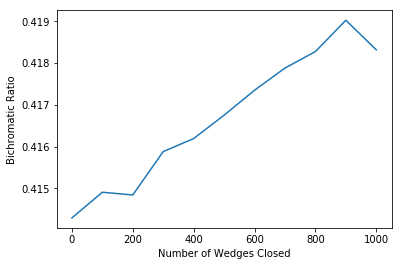

In [143]:
plt.plot(range(0, 1100, 100), bichromatic_ratios)
plt.xlabel("Number of Wedges Closed")
plt.ylabel("Bichromatic Ratio")
plt.show()

In [275]:
def get_centrality_types():
    return {
        "Degree": centrality.degree_centrality,
        "Eigenvector": centrality.eigenvector_centrality,
#         "Katz": centrality.katz_centrality,
        "Closeness": centrality.closeness_centrality,
#         "Flow-Closeness": centrality.current_flow_closeness_centrality,
        "Betweenness": centrality.betweenness_centrality,
#         "Flow-Betweenness": centrality.current_flow_betweenness_centrality
    }

In [276]:
def get_majority(G, party_affil_dict):
    count = 0
    for node in G.nodes():
        if party_affil_dict[last_name(node)] == "Democrat":
            count += 1
        elif party_affil_dict[last_name(node)] == "Republican":
            count -= 1
    if count > 0:
        return "Democrat"
    else:
        return "Republican"

In [277]:
get_majority(G, party_affil_dict)

'Republican'

In [235]:
t = 5
for congress in range(93, 115):
    congress_df = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_" + str(congress) + "_congress.csv")
    congress_df = below_threshold_df(congress_df, t)
    try:
        os.mkdir("data/below_" + str(t) + "_cosponsors")
    except:
        print("directory data/below_" + str(t) + "_cosponsors already exists")
    congress_df.to_csv("data/below_" + str(t) + "_cosponsors/congress_" + str(congress) + ".csv")

directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists


/Users/emmaling/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists
directory data/below_5_cosponsors already exists


In [270]:
t = 5
for congress in range(93, 115):
    congress_df = pd.read_csv("data/below_" + str(t) + "_cosponsors/congress_" + str(congress) + ".csv")
    G = make_graph(congress_df, party_affil_dict)
    write_gpickle(G, "data/graphs/congress_" + str(congress) + "_below_" + str(t) + ".pkl")

In [308]:
def ave_centrality(party_affil_dict, centrality_type):
    majority_ratio, ave_maj_centrality, ave_min_centrality, maj_parties = [], [], [], []
    t = 5
    for congress in range(93, 115):
        G = read_gpickle("data/graphs/congress_" + str(congress) + "_below_" + str(t) + ".pkl")
        maj_party = get_majority(G, party_affil_dict)
        try:
            centrality_dict = get_centrality_types()[centrality_type](G)
            maj_parties.append(maj_party)
            maj_centralities = []
            min_centralities = []
            for cosponsor in centrality_dict:
                if party_affil_dict[last_name(cosponsor)] == maj_party:
                    maj_centralities.append(centrality_dict[cosponsor])
                else:
                    min_centralities.append(centrality_dict[cosponsor])
            ave_maj_centrality.append(np.average(maj_centralities))
            ave_min_centrality.append(np.average(min_centralities))
            majority_ratio.append(len(maj_centralities) / (len(maj_centralities) + len(min_centralities)))
        except:
            print("error on congress " + str(congress))
    return np.array(ave_maj_centrality), np.array(ave_min_centrality), np.array(majority_ratio), np.array(maj_parties)

In [302]:
ave_centralities = ave_centrality(party_affil_dict, "Degree")

In [303]:
ave_centralities

(array([ 0.03311314,  0.03617818,  0.03357553,  0.02085358,  0.02191215,
         0.02055676,  0.02167819,  0.02213094,  0.02214675,  0.02253843,
         0.02180503,  0.01892419,  0.02141375,  0.02379103,  0.0237736 ,
         0.02618568,  0.02963108,  0.03080934,  0.04060919,  0.0357289 ,
         0.03249604,  0.04143729]),
 array([ 0.02970607,  0.03554416,  0.03729034,  0.02436981,  0.02365333,
         0.02296711,  0.02386175,  0.02266014,  0.02292335,  0.02457342,
         0.02117945,  0.01833595,  0.02052885,  0.02401997,  0.02578147,
         0.02802169,  0.03119013,  0.03671605,  0.03365602,  0.0295058 ,
         0.03573732,  0.04237589]),
 array([ 0.53932584,  0.61495327,  0.6122449 ,  0.59022556,  0.53598485,
         0.57438795,  0.55597723,  0.56190476,  0.58130841,  0.5891182 ,
         0.56497175,  0.52975048,  0.50280374,  0.50844278,  0.50651769,
         0.53195489,  0.54059406,  0.50638298,  0.52798054,  0.51506849,
         0.50473186,  0.50530035]),
 array(['Democra

In [281]:
def plot_centralities(ave_centralities, centrality_type):
    plt.scatter(ave_centralities[2], ave_centralities[0], label="majority")
    plt.scatter(ave_centralities[2], ave_centralities[1], label="minority")
    plt.xlabel("Majority Ratio")
    plt.ylabel("Average " + centrality_type + " Centrality")
    plt.legend()
    plt.title("Average " + centrality_type + " Centrality of Majority and Minority in Congresses")
    plt.savefig("plots/" + centrality_type + "_centrality_congresses")
    plt.show()

error on congress 93
error on congress 94
error on congress 95


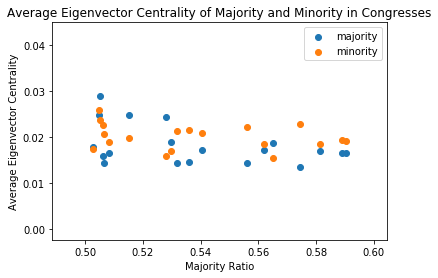

In [290]:
cent = "Eigenvector"
plot_centralities(ave_centrality(party_affil_dict, cent), cent)

In [306]:
def plot_centrality_diff(ave_centralities, centrality_type):
    plt.scatter(ave_centralities[2][ave_centralities[3]=='Democrat'], ave_centralities[0][ave_centralities[3]=='Democrat'] - ave_centralities[1][ave_centralities[3]=='Democrat'], label="Democrat majority")
    plt.scatter(ave_centralities[2][ave_centralities[3]=='Republican'], ave_centralities[0][ave_centralities[3]=='Republican'] - ave_centralities[1][ave_centralities[3]=='Republican'], label="Republican majority")
    plt.xlabel("Majority Ratio")
    plt.ylabel("Average " + centrality_type + " Centrality Difference")
    plt.legend()
    plt.title("Average " + centrality_type + " Centrality Difference between Majority and Minority in Congresses")
    plt.savefig("plots/" + centrality_type + "_centrality_diff_congresses")
    plt.show()

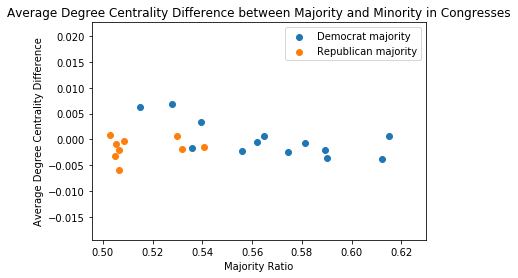

error on congress 93
error on congress 94
error on congress 95


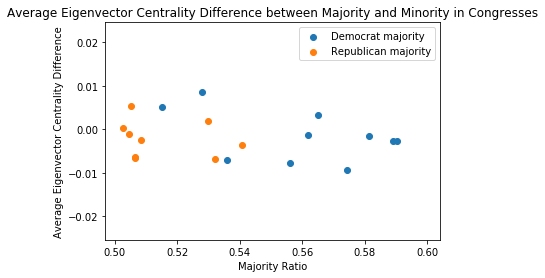

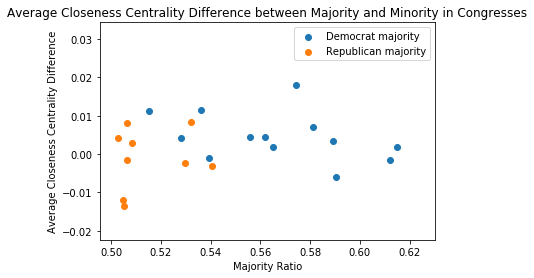

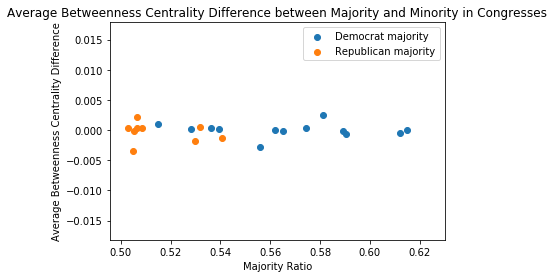

In [309]:
for cent in get_centrality_types():
    plot_centrality_diff(ave_centrality(party_affil_dict, cent), cent)